# About the Data.
- This data is from <a href="https://www.kaggle.com/competitions/kaggle-survey-2022/data">Kaggle</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import json
import time

In [2]:
data = pd.read_csv("kaggle_survey_2022_responses.csv", low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23998 entries, 0 to 23997
Columns: 296 entries, Duration (in seconds) to Q44_12
dtypes: object(296)
memory usage: 54.2+ MB


In [5]:
data.head(2)

Duration (in seconds)                           Q2  \
0  Duration (in seconds)  What is your age (# years)?   
1                    121                        30-34   

                                       Q3  \
0  What is your gender? - Selected Choice   
1                                     Man   

                                          Q4  \
0  In which country do you currently reside?   
1                                      India   

                                                  Q5  \
0  Are you currently a student? (high school, uni...   
1                                                 No   

                                                Q6_1  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                                Q6_2  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                                Q6_3  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                                Q6_4  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                                Q6_5  ...  \
0  On which platforms have you begun or completed...  ...   
1                                                NaN  ...   

                                               Q44_3  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                               Q44_4  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                               Q44_5  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                               Q44_6  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                               Q44_7  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                               Q44_8  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                               Q44_9  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                              Q44_10  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                              Q44_11  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                              Q44_12  
0  Who/what are your favorite media sources that ...  
1                                                NaN  

[2 rows x 296 columns]

### I am first going to explore the amount of time spent on the survey by each country.

In [6]:
def convert(seconds):
    return time.strftime("%H:%M:%S", time.gmtime(seconds))

In [7]:
cumulative_time_spent_on_survey = data[['Duration (in seconds)', 'Q4']].iloc[1:,]
cumulative_time_spent_on_survey["Duration (in seconds)"] = cumulative_time_spent_on_survey["Duration (in seconds)"].astype("int32")
cumulative_time_by_country = cumulative_time_spent_on_survey.groupby("Q4").agg({"Duration (in seconds)":"sum"}).sort_values(by="Duration (in seconds)")
duration_formatted = pd.DataFrame(cumulative_time_by_country["Duration (in seconds)"].apply(convert))
cumulative_time_by_country_sec_hour = cumulative_time_by_country.merge(duration_formatted, how="inner", on="Q4")
cumulative_time_by_country_sec_hour.head()

Duration (in seconds)_x  \
Q4                                                               
I do not wish to disclose my location                    19426   
Nepal                                                    46632   
Singapore                                                60704   
Romania                                                  66673   
Philippines                                              67888   

                                      Duration (in seconds)_y  
Q4                                                             
I do not wish to disclose my location                05:23:46  
Nepal                                                12:57:12  
Singapore                                            16:51:44  
Romania                                              18:31:13  
Philippines                                          18:51:28

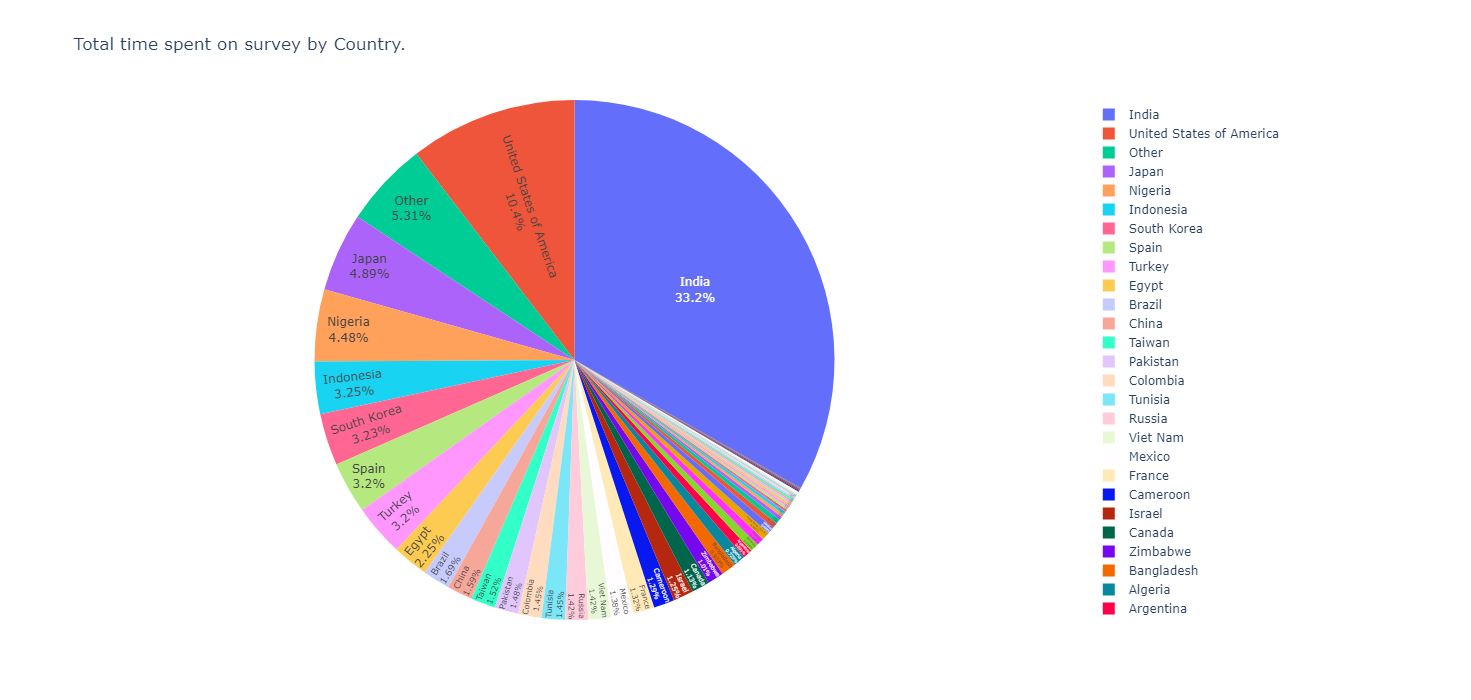

In [8]:
fig = px.pie(
    cumulative_time_by_country_sec_hour, 
    names=cumulative_time_by_country_sec_hour.index, 
    values="Duration (in seconds)_x", 
    height=700, 
    width=1500, 
    hover_data=["Duration (in seconds)_y"], 
    labels={"Duration (in seconds)_x": "Time in seconds", "Duration (in seconds)_y": "Formatted time: (H:M:S)"}, title="Total time spent on survey by Country.")

fig.update_traces(textposition="inside", textinfo="percent+label")

fig.show()

### Next I am going to explore age groups involved in the survey.

In [113]:
age_group = pd.DataFrame(data[["Q2"]].iloc[1:,].value_counts(), columns=["Totals"])
age_group.reset_index(inplace=True)
age_group

Q2  Totals
0   18-21    4559
1   25-29    4472
2   22-24    4283
3   30-34    2972
4   35-39    2353
5   40-44    1927
6   45-49    1253
7   50-54     914
8   55-59     611
9   60-69     526
10    70+     127

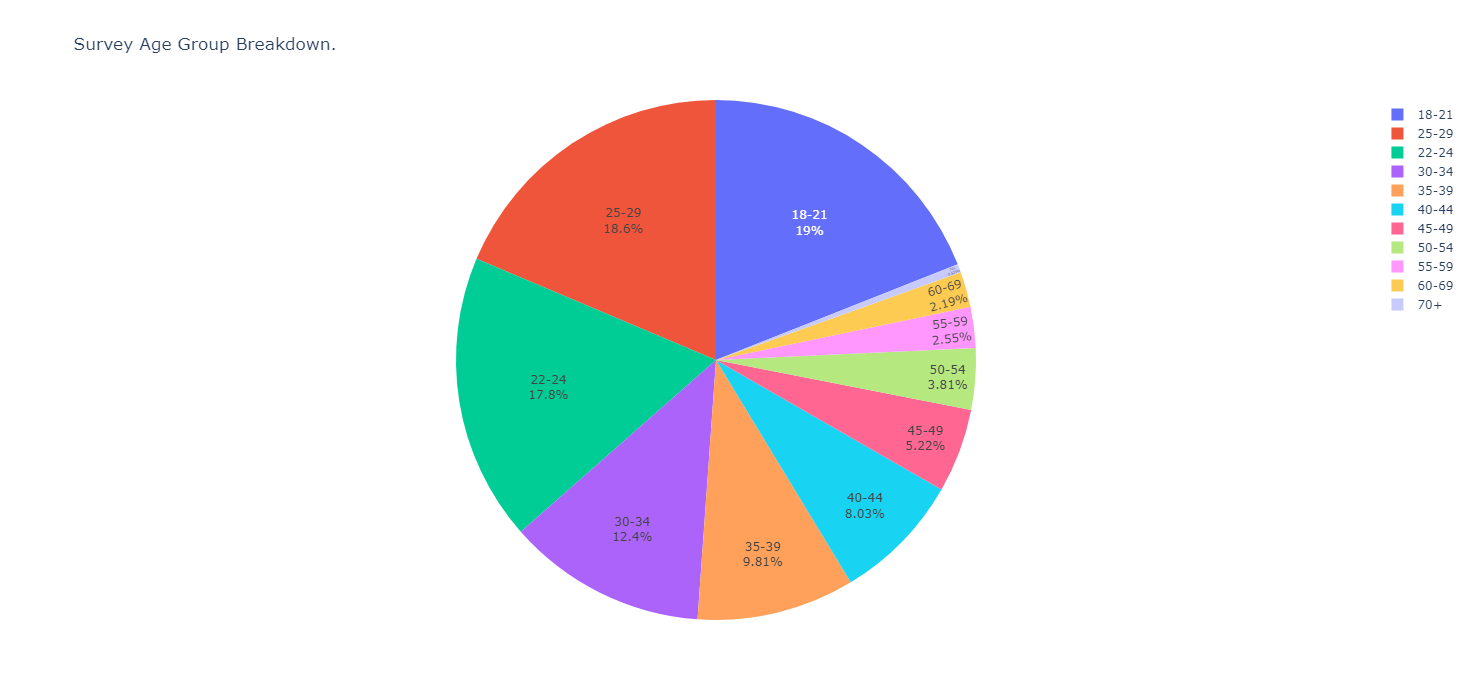

In [97]:
fig = px.pie(age_group, names="Q2", values="Totals", height=700, width=1300, title="Survey Age Group Breakdown.")

fig.update_traces(textposition="inside", textinfo="percent+label")

fig.show()

In [107]:
gender_make_up = pd.DataFrame(data[["Q3"]]
                              .iloc[1:,]
                              .value_counts(), columns=["Gender Totals"])
gender_make_up.reset_index(inplace=True)

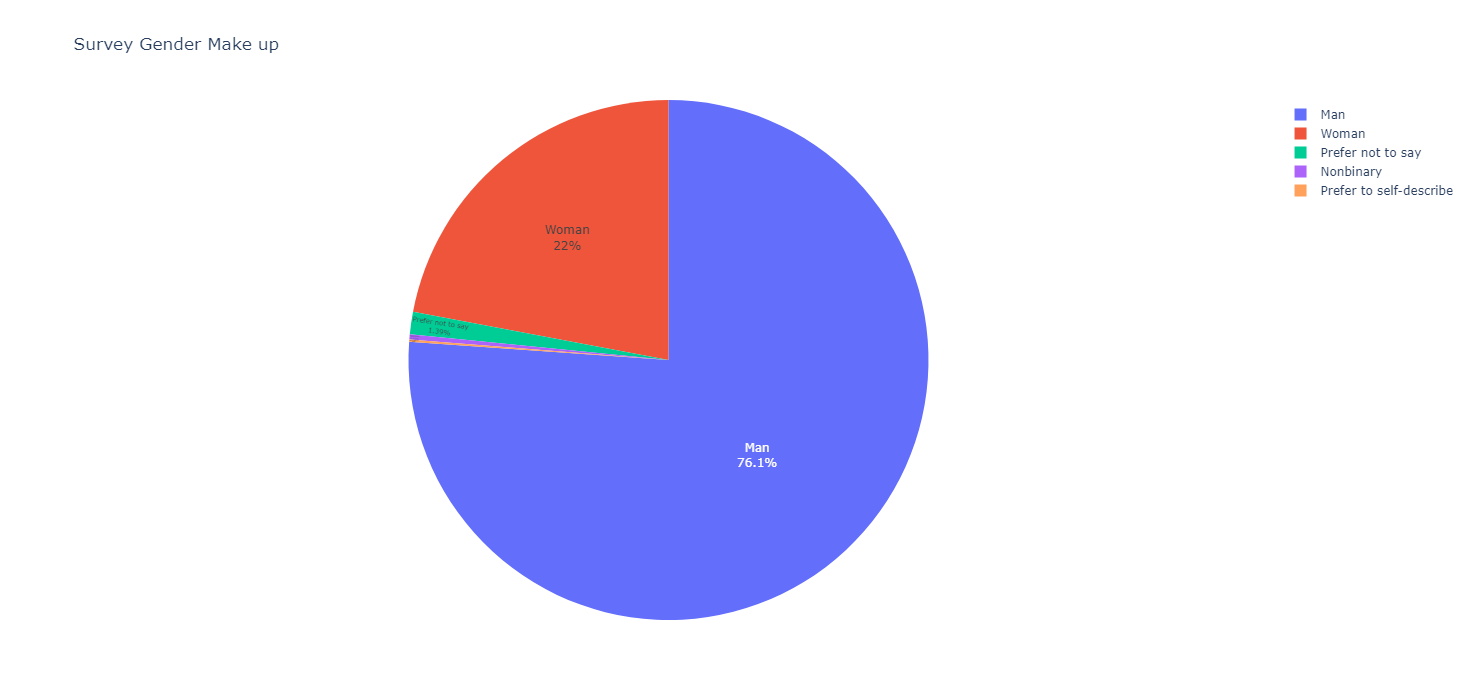

In [112]:
fig = px.pie(gender_make_up, 
             values='Gender Totals', 
             names="Q3", 
             height=700, 
             width=1300, 
             title="Survey Gender Make up", 
             hover_data=["Gender Totals"],)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

- Most participants of the survey are Men.

### Next I am going to look at how the countries are represented in the data.

In [122]:
country_groups = pd.DataFrame(data[["Q4"]].iloc[1:,].value_counts(), columns=["Totals"])
country_groups.reset_index(inplace=True)
country_groups.head()

Q4  Totals
0                     India    8792
1  United States of America    2920
2                     Other    1430
3                    Brazil     833
4                   Nigeria     731

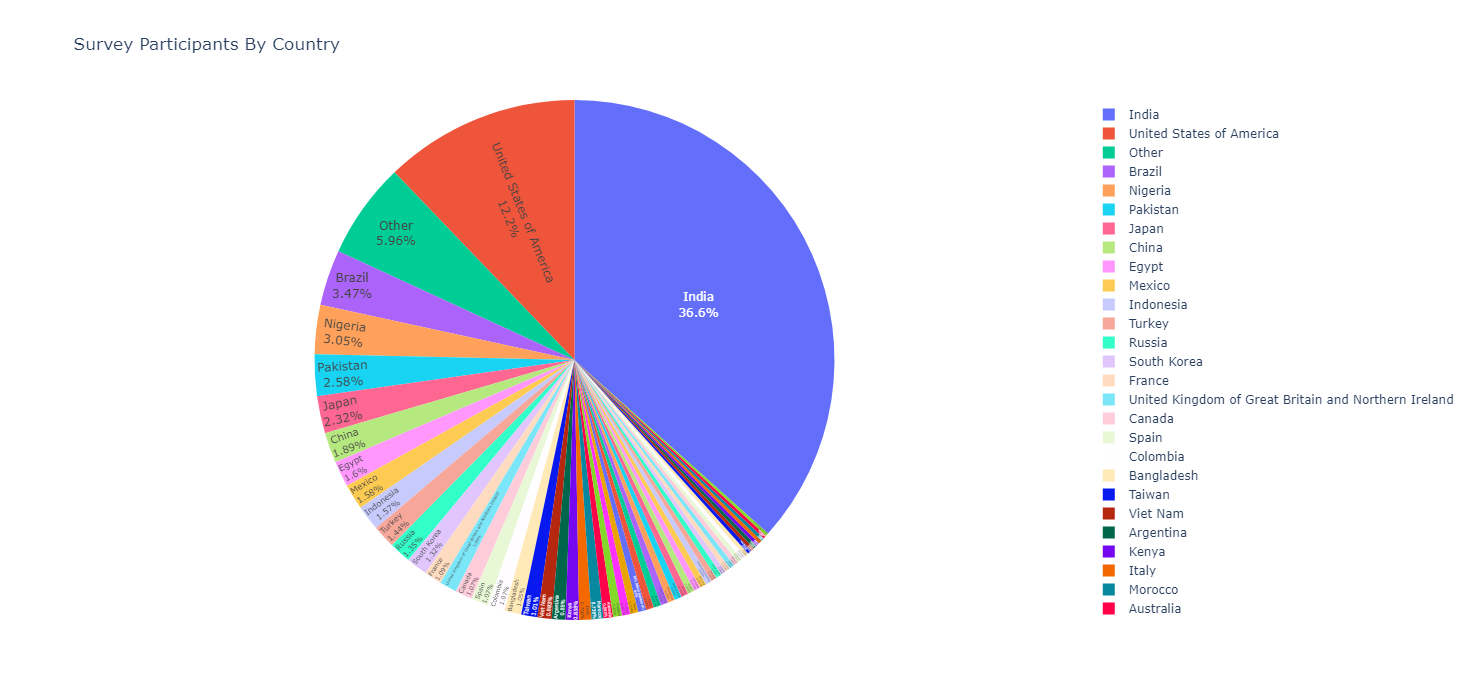

In [127]:
fig = px.pie(country_groups, 
             values='Totals', 
             names="Q4", 
             height=700, 
             width=1300, 
             title="Survey Participants By Country", 
             hover_data=["Q4"], labels={"Q4":"Country"})

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

### I am fascinated by India.
- Are the participants mostly Students?

In [141]:
india_group = data[data["Q4"].eq("India")].groupby("Q5").agg({"Q5":"count"}).rename(columns={"Q5":"Student"})
india_group

Student
Q5          
No      3825
Yes     4967

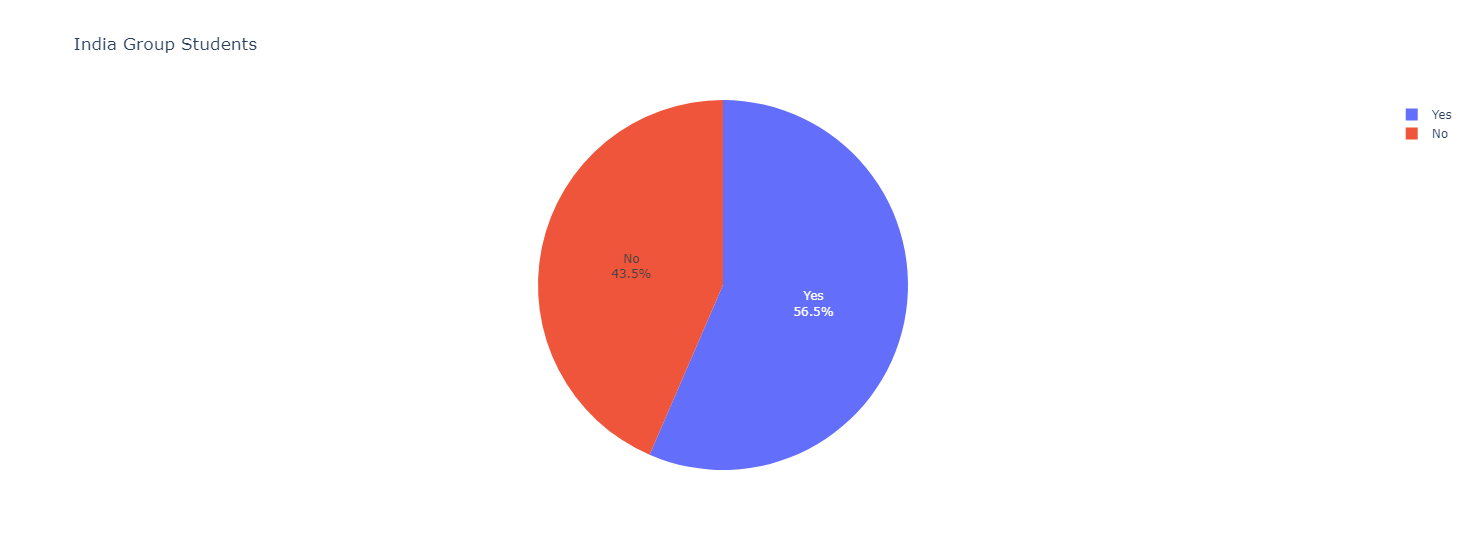

In [144]:
fig = px.pie(india_group, 
             values='Student', 
             names=india_group.index, 
             height=550, 
             width=1000, 
             title="India Group Students", 
             hover_data=["Student"], labels={"Q5":"Student?", "Student":"Number"})

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### India had more students participating in the Survey.
- I am curious as to how things look in USA.

In [145]:
usa_group = data[data["Q4"].eq("United States of America")].groupby("Q5").agg({"Q5":"count"}).rename(columns={"Q5":"Student"})
usa_group

Student
Q5          
No      1996
Yes      924

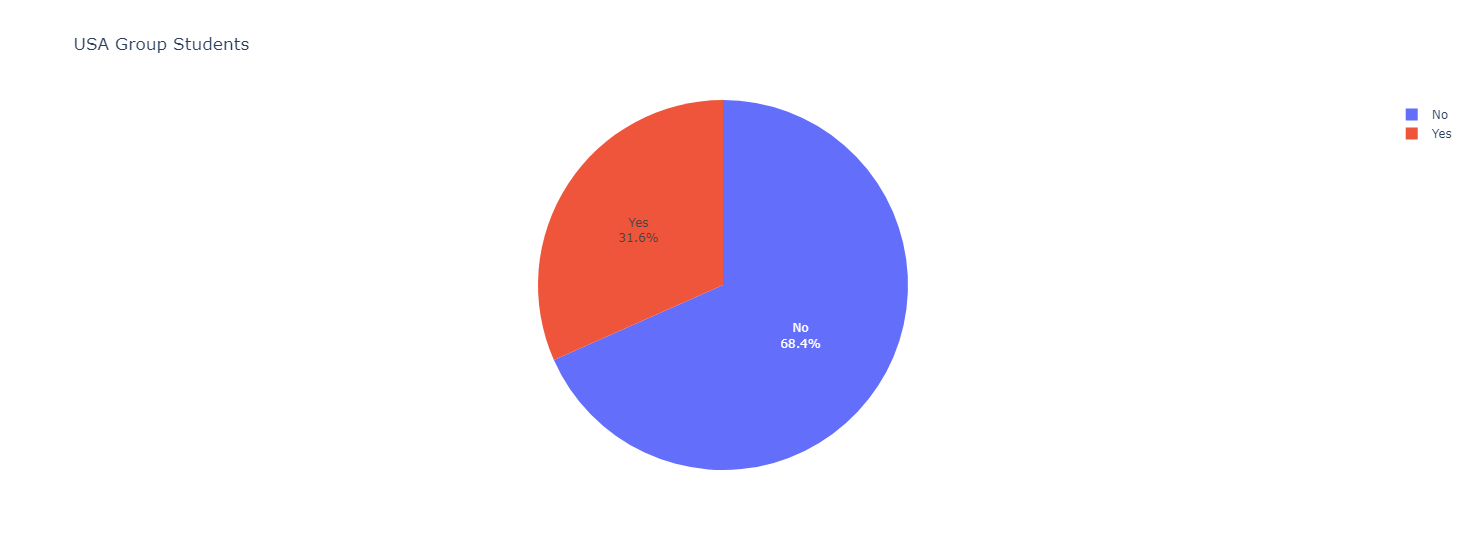

In [151]:
fig = px.pie(usa_group, 
             values='Student', 
             names=usa_group.index, 
             height=550, 
             width=1000, 
             title="USA Group Students", 
             hover_data=["Student"], 
             labels={"Q5":"Student?", "Student":"Number"})

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### The picture is different in the USA. There were less students.
- Since I am in South Africa, I might as well see how things look over here.

In [149]:
sa_group = data[data["Q4"].eq("South Africa")].groupby("Q5").agg({"Q5":"count"}).rename(columns={"Q5":"Student"})
sa_group

Student
Q5          
No        51
Yes       58

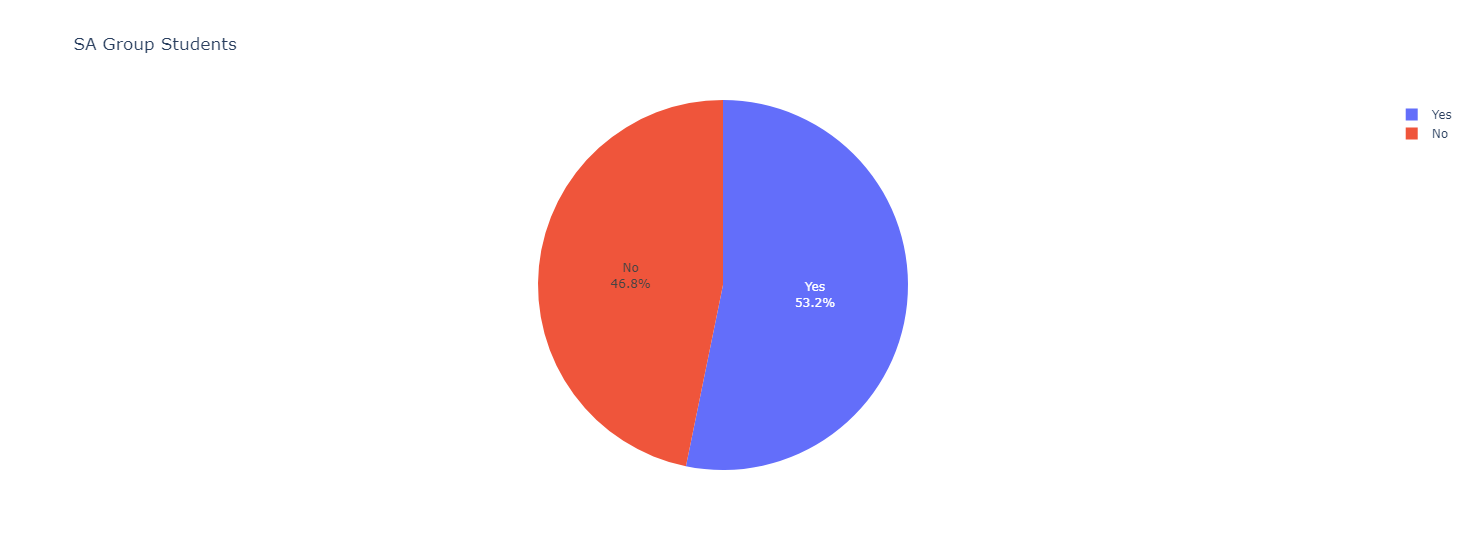

In [152]:
fig = px.pie(sa_group, 
             values='Student', 
             names=sa_group.index, 
             height=550, 
             width=1000, 
             title="SA Group Students", 
             hover_data=["Student"], labels={"Q5":"Student?", "Student":"Number"})

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [155]:
institution_columns = [column for column in data.columns if column.startswith("Q6")]

In [162]:
institutions = data[institution_columns].iloc[0].str.split("- ").str.get(-1).str.strip()

In [176]:
edu_platforms = pd.DataFrame(data[institution_columns]
                             .rename(columns=dict(zip(institution_columns, institutions))).iloc[1:,]
                             .fillna(0)
                             .ne(0)
                             .sum(), columns=["Totals"]).reset_index().rename(columns={"index":"Platform"}).sort_values(by="Totals")
edu_platforms

Platform  Totals
4                                             Fast.ai     944
8   Cloud-certification programs (direct from AWS,...    1821
5                                             Udacity    2199
1                                                 edX    2474
10                                               None    2643
7                                   LinkedIn Learning    2766
3                                            DataCamp    3718
11                                              Other    5669
6                                               Udemy    6116
2                                Kaggle Learn Courses    6628
9   University Courses (resulting in a university ...    6780
0                                            Coursera    9699

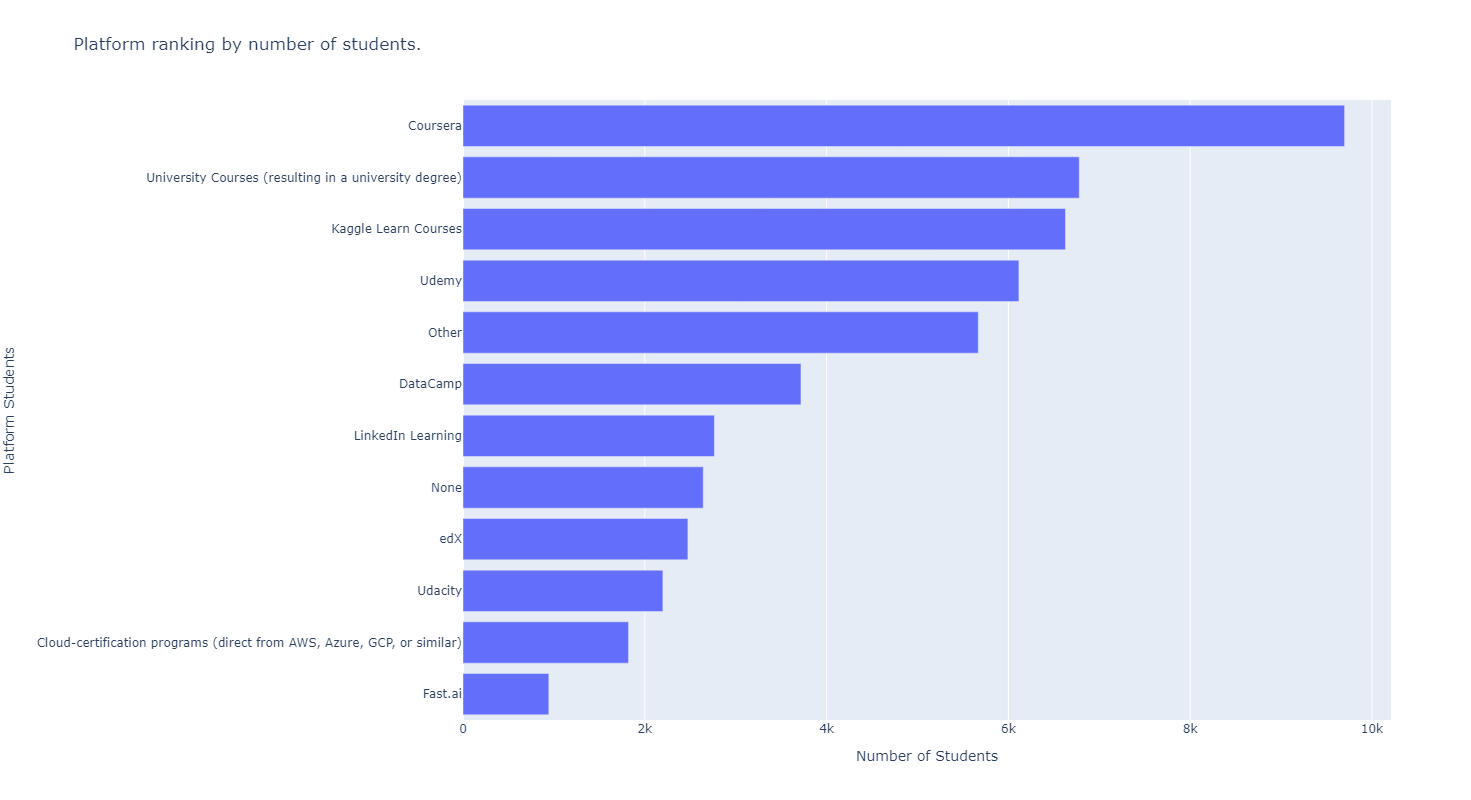

In [181]:
fig = px.bar(edu_platforms, 
             y="Platform", 
             x="Totals", 
             title="Platform ranking by number of students.", 
             labels={"Totals": "Number of Students", "Platform": "Platform Students"}, height=800, width=1300)

fig.show()

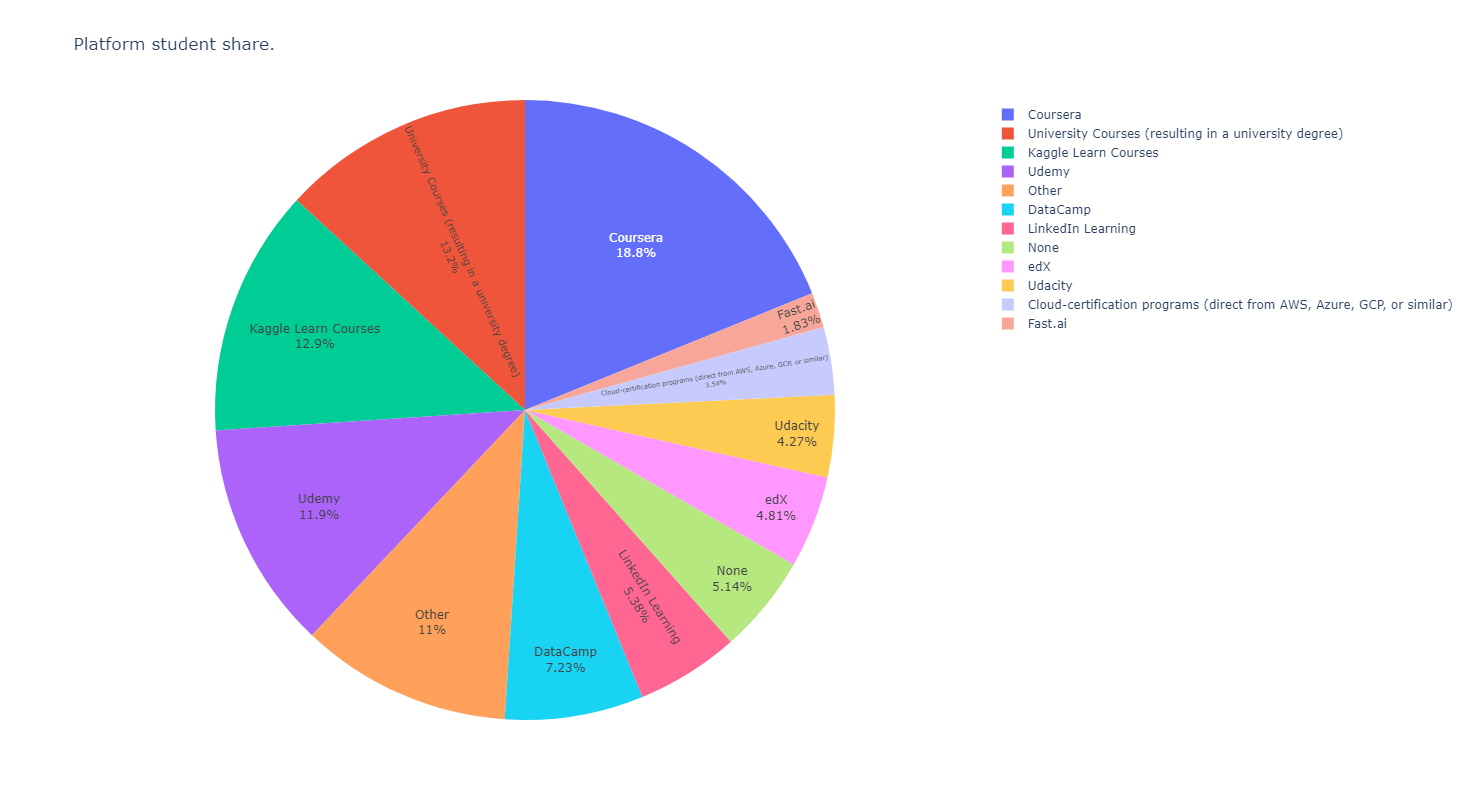

In [186]:
fig = px.pie(edu_platforms, 
             values="Totals", 
             names="Platform", 
             title="Platform student share.", 
             hover_data=["Platform"],
             width=1500, 
             height=800)

fig.update_traces(textposition="inside", textinfo="percent+label")

fig.show()

In [28]:
columns = [f"Q12_{i}" for i in range(1, 16)]
columns

['Q12_1',
 'Q12_2',
 'Q12_3',
 'Q12_4',
 'Q12_5',
 'Q12_6',
 'Q12_7',
 'Q12_8',
 'Q12_9',
 'Q12_10',
 'Q12_11',
 'Q12_12',
 'Q12_13',
 'Q12_14',
 'Q12_15']

In [29]:
languages = [data[columns[i]][0].split()[-1] for i in range(len(columns))]
languages

['Python',
 'R',
 'SQL',
 'C',
 'C#',
 'C++',
 'Java',
 'Javascript',
 'Bash',
 'PHP',
 'MATLAB',
 'Julia',
 'Go',
 'None',
 'Other']

In [30]:
language_count = [data[n].eq(languages[i]).sum() for i,n in enumerate(columns)]
language_count

[18653,
 4571,
 9620,
 3801,
 1473,
 4549,
 3862,
 3489,
 1674,
 1443,
 2441,
 296,
 322,
 256,
 1342]

In [31]:
language_data = {
    "Language": languages,
    "Num_users": language_count
}

In [32]:
df_programming_languages = pd.DataFrame(language_data)
df_programming_languages.sort_values(by="Num_users", inplace=True, ascending=False)
df_programming_languages

Language  Num_users
0       Python      18653
2          SQL       9620
1            R       4571
5          C++       4549
6         Java       3862
3            C       3801
7   Javascript       3489
10      MATLAB       2441
8         Bash       1674
4           C#       1473
9          PHP       1443
14       Other       1342
12          Go        322
11       Julia        296
13        None        256

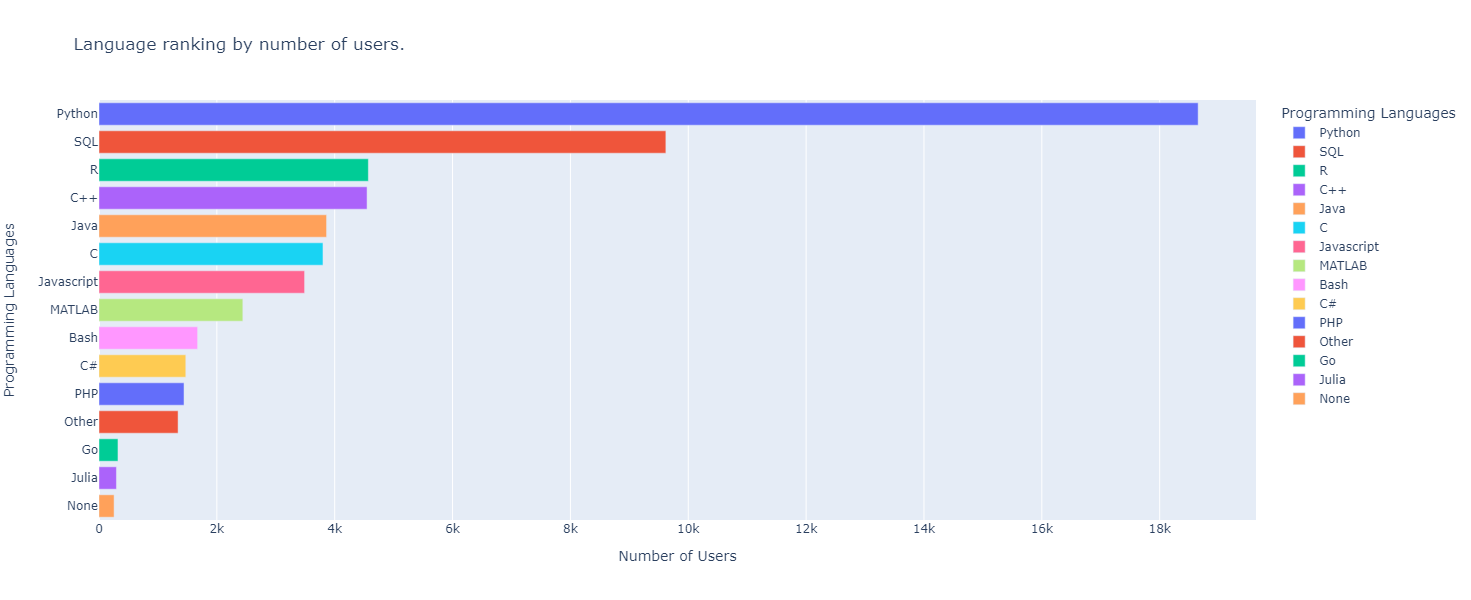

In [33]:
fig = px.bar(df_programming_languages, 
             y="Language", 
             x="Num_users", 
             title="Language ranking by number of users.", 
             labels={"Num_users": "Number of Users", "Language": "Programming Languages"}, 
             height=600, 
             width=1000, color="Language")

fig.show()

In [34]:
data["Q29"].fillna(0, inplace=True)

In [35]:
with_pay  = data[data["Q29"].ne(0)]
smaller_df_paid = with_pay[["Q2", "Q3", "Q4", "Q29"]]

In [36]:
smaller_df_paid = smaller_df_paid.iloc[1:]

In [37]:
smaller_df_paid["Q29"].str.replace(",", "").str.split("-").str.get(0)

4         25000
8        100000
9        100000
14       200000
17       200000
          ...  
23985    100000
23990      2000
23991        $0
23995     25000
23996     15000
Name: Q29, Length: 8136, dtype: object

In [38]:
smaller_df_paid["Min_earnings"] = smaller_df_paid["Q29"].str.replace(",", "").str.split("-").str.get(0)
smaller_df_paid["Max_earnings"] = smaller_df_paid["Q29"].str.replace(",", "").str.split("-").str.get(1)

In [39]:
smaller_df_paid["Min_earnings"] = smaller_df_paid["Min_earnings"].str.replace("$", "", regex=True)
smaller_df_paid["Min_earnings"] = smaller_df_paid["Min_earnings"].str.replace(">", "", regex=True)
smaller_df_paid["Max_earnings"] = smaller_df_paid["Max_earnings"].str.replace("$", "", regex=True)

In [40]:
max_earnings_scale = (
    smaller_df_paid
    .groupby(["Max_earnings"])
    .agg({"Max_earnings":"count"})
    .rename(columns={"Max_earnings":"Number_of_earners"})
    .sort_values(by="Number_of_earners", ascending=False))

max_earnings_scale

Number_of_earners
Max_earnings                   
999                        1112
14999                       493
39999                       464
1999                        444
49999                       421
124999                      404
7499                        391
59999                       366
9999                        362
199999                      342
24999                       337
69999                       318
19999                       299
79999                       289
29999                       277
2999                        271
149999                      269
3999                        244
4999                        234
89999                       222
99999                       197
249999                      155
299999                       78
499999                       76
999999                       48

In [41]:
earnings_category = (
    smaller_df_paid
    .groupby("Q29")
    .agg({"Q29":"count"})
    .rename(columns={"Q29":"Number_of_earners"})
    .sort_values(by="Number_of_earners", ascending=False))

earnings_category

Number_of_earners
Q29                                
$0-999                         1112
10,000-14,999                   493
30,000-39,999                   464
1,000-1,999                     444
40,000-49,999                   421
100,000-124,999                 404
5,000-7,499                     391
50,000-59,999                   366
7,500-9,999                     362
150,000-199,999                 342
20,000-24,999                   337
60,000-69,999                   318
15,000-19,999                   299
70,000-79,999                   289
25,000-29,999                   277
2,000-2,999                     271
125,000-149,999                 269
3,000-3,999                     244
4,000-4,999                     234
80,000-89,999                   222
90,000-99,999                   197
200,000-249,999                 155
250,000-299,999                  78
300,000-499,999                  76
$500,000-999,999                 48
>$1,000,000                      23

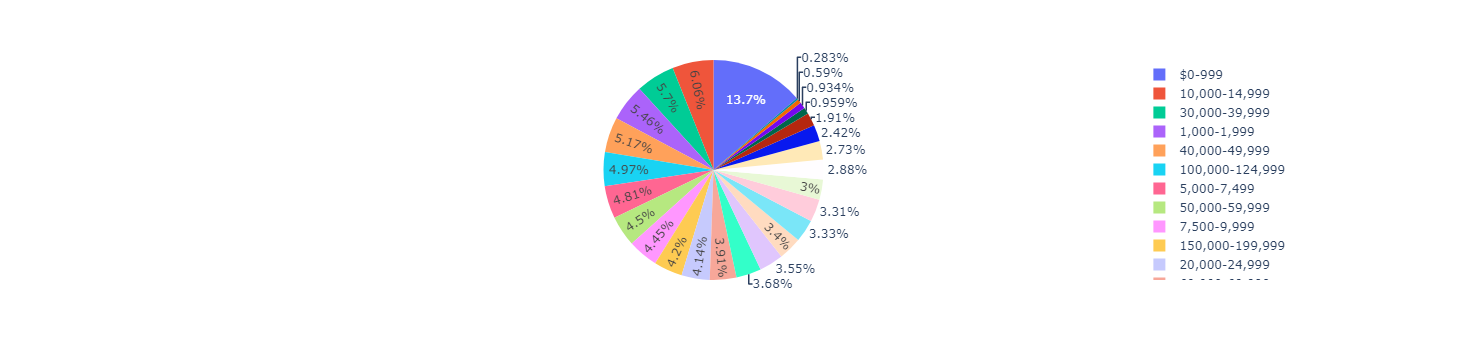

In [42]:
fig = px.pie(earnings_category, values="Number_of_earners", names=earnings_category.index)

fig.show()

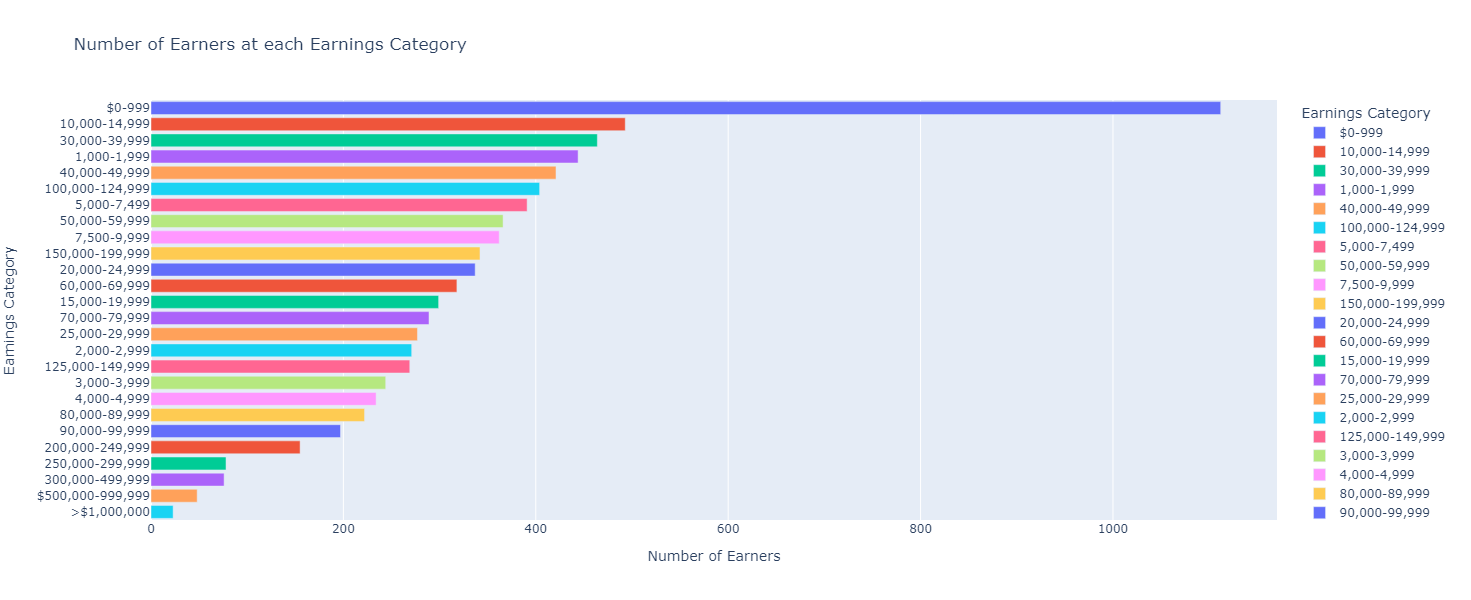

In [43]:
fig = px.bar(earnings_category, 
             x="Number_of_earners", 
             y=earnings_category.index, 
             color=earnings_category.index, 
             labels={"Q29":"Earnings Category", "Number_of_earners":"Number of Earners"}, 
             title="Number of Earners at each Earnings Category", 
             height=600, 
             width=1000)

fig.show()

In [44]:
smaller_df_paid["Min_earnings"] = smaller_df_paid["Min_earnings"].astype("int32")
smaller_df_paid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8136 entries, 4 to 23996
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Q2            8136 non-null   object
 1   Q3            8136 non-null   object
 2   Q4            8136 non-null   object
 3   Q29           8136 non-null   object
 4   Min_earnings  8136 non-null   int32 
 5   Max_earnings  8113 non-null   object
dtypes: int32(1), object(5)
memory usage: 413.2+ KB


In [45]:
earning_70k_or_more = smaller_df_paid[smaller_df_paid["Min_earnings"].ge(70000)]
earning_70k_or_more

Q2                 Q3                        Q4              Q29  \
8      30-34                Man                   Germany  100,000-124,999   
9        70+                Man                 Australia  100,000-124,999   
14     40-44                Man  United States of America  200,000-249,999   
17     40-44                Man  United States of America  200,000-249,999   
18     30-34                Man  United States of America  150,000-199,999   
...      ...                ...                       ...              ...   
23869  35-39  Prefer not to say  United States of America  150,000-199,999   
23909  30-34                Man  United States of America  200,000-249,999   
23924  30-34                Man  United States of America    90,000-99,999   
23982  45-49                Man                     India  100,000-124,999   
23985  40-44                Man  United States of America  100,000-124,999   

       Min_earnings Max_earnings  
8            100000       124999  
9            100000       124999  
14           200000       249999  
17           200000       249999  
18           150000       199999  
...             ...          ...  
23869        150000       199999  
23909        200000       249999  
23924         90000        99999  
23982        100000       124999  
23985        100000       124999  

[2103 rows x 6 columns]

In [46]:
top_earners_by_country = (
    earning_70k_or_more
    .groupby("Q4")
    .agg({"Q29":"count"})
    .rename(columns={"Q29":"Earning_70k_or_more"})
    .sort_values(by="Earning_70k_or_more", ascending=False)).head(20)

top_earners_by_country.head()

Earning_70k_or_more
Q4                                                                     
United States of America                                           1111
India                                                               138
Other                                                                87
Japan                                                                79
United Kingdom of Great Britain and Northern Ir...                   74

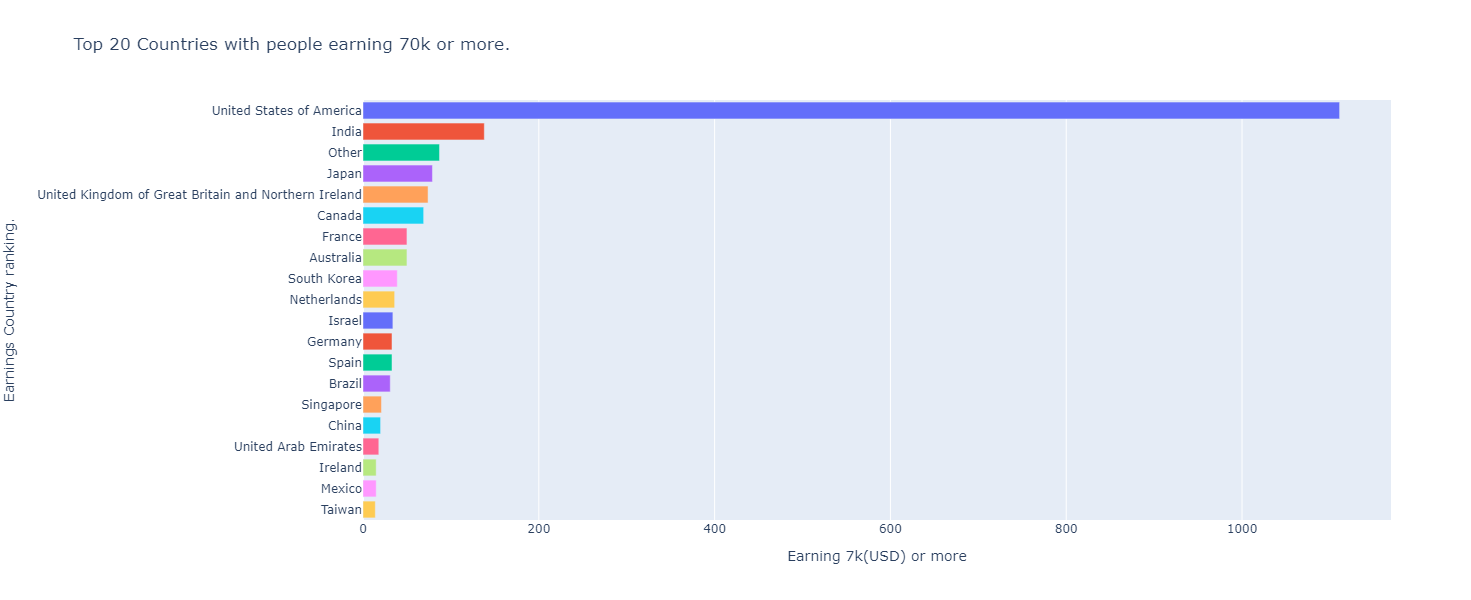

In [47]:
fig = px.bar(top_earners_by_country, 
             x="Earning_70k_or_more", 
             y=top_earners_by_country.index, 
             color=top_earners_by_country.index, 
             title="Top 20 Countries with people earning 70k or more.", 
             height=600, 
             width=1000, labels={"Earning_70k_or_more":"Earning 7k(USD) or more", "Q4":"Earnings Country ranking."})


fig.update_traces(showlegend=False)

fig.show()

In [48]:
data["Q29"].unique()

array(['What is your current yearly compensation (approximate $USD)?', 0,
       '25,000-29,999', '100,000-124,999', '200,000-249,999',
       '150,000-199,999', '90,000-99,999', '30,000-39,999', '3,000-3,999',
       '50,000-59,999', '125,000-149,999', '15,000-19,999', '5,000-7,499',
       '10,000-14,999', '20,000-24,999', '$0-999', '7,500-9,999',
       '4,000-4,999', '80,000-89,999', '2,000-2,999', '250,000-299,999',
       '1,000-1,999', '$500,000-999,999', '70,000-79,999',
       '60,000-69,999', '40,000-49,999', '>$1,000,000', '300,000-499,999'],
      dtype=object)

In [49]:
mixed_earners_non_earners = data.iloc[1:,][["Q2", "Q3", "Q4", "Q11", "Q29"]]
mixed_earners_non_earners["Q11"].fillna(0, inplace=True)
mixed_earners_non_earners["Q29"].fillna(0, inplace=True)

In [50]:
mixed_earners_non_earners.head()

Q2   Q3       Q4          Q11            Q29
1  30-34  Man    India            0              0
2  30-34  Man  Algeria    1-3 years              0
3  18-21  Man    Egypt    1-3 years              0
4  55-59  Man   France  10-20 years  25,000-29,999
5  45-49  Man    India   5-10 years              0

In [51]:
mixed_earners_non_earners["Minimum_earnings"] = (
    mixed_earners_non_earners["Q29"]
    .str.split("-")
    .str.get(0)
    .str.replace(",", "", regex=True)
    .str.replace("$", "", regex=True)
    .str.replace(">", "", regex=True)
    .fillna(0).astype('int32'))

In [52]:
mixed_earners_non_earners["Maximum_earnings"] = (
    mixed_earners_non_earners["Q29"]
    .str.split("-")
    .str.get(1)
    .str.replace(",", "", regex=True)
    .str.replace("$", "", regex=True)
    .str.replace(">", "", regex=True)
    .fillna(0).astype('int32'))

In [53]:
mixed_earners_non_earners.head()

Q2   Q3       Q4          Q11            Q29  Minimum_earnings  \
1  30-34  Man    India            0              0                 0   
2  30-34  Man  Algeria    1-3 years              0                 0   
3  18-21  Man    Egypt    1-3 years              0                 0   
4  55-59  Man   France  10-20 years  25,000-29,999             25000   
5  45-49  Man    India   5-10 years              0                 0   

   Maximum_earnings  
1                 0  
2                 0  
3                 0  
4             29999  
5                 0

In [54]:
df_group_minimums = (
    mixed_earners_non_earners
    .groupby("Q11", as_index=False)
    .agg({"Minimum_earnings":"mean"})
    .iloc[1:,]
    .rename(columns={"Minimum_earnings":"Min_average", "Q11":"Years Of Coding experience"})
    .sort_values(by="Min_average", ascending=False))

df_group_minimums

Years Of Coding experience   Min_average
3                  20+ years  64603.122967
2                10-20 years  47752.082177
5                 5-10 years  31621.674491
4                  3-5 years  14178.140630
7  I have never written code   8301.423662
1                  1-3 years   6629.509212
6                  < 1 years   4738.907224

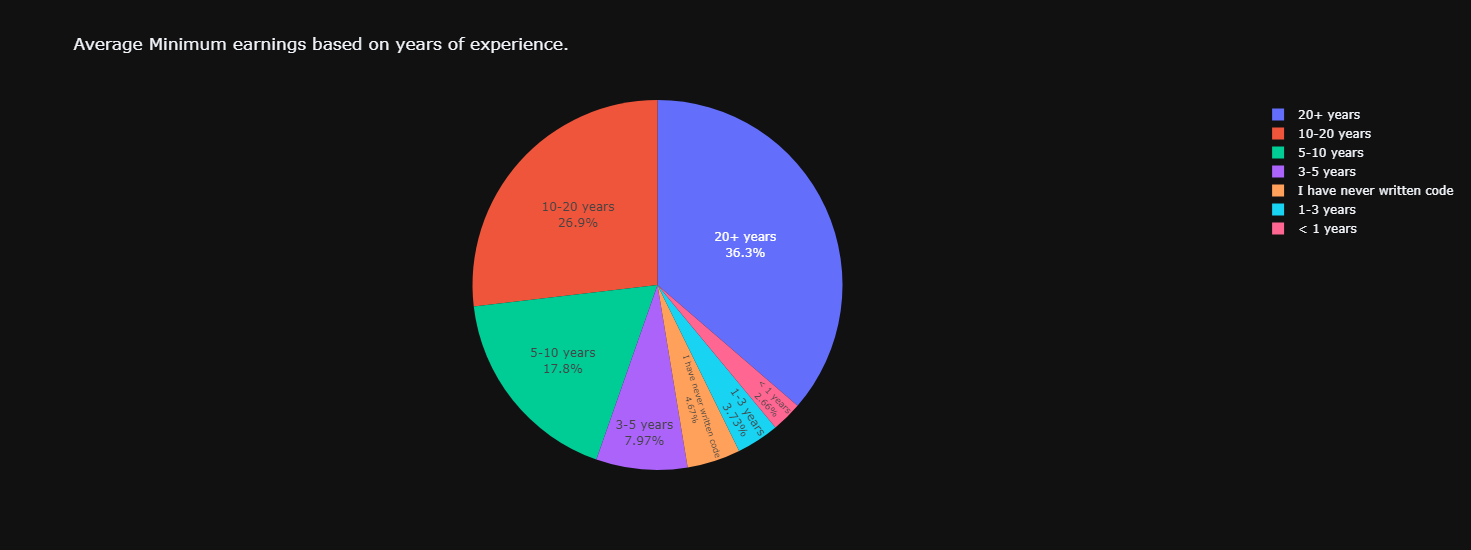

In [55]:
fig = px.pie(df_group_minimums, 
             values="Min_average", 
             names="Years Of Coding experience", 
             title="Average Minimum earnings based on years of experience.", 
             template="plotly_dark", 
             width=1000, 
             height=550)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

In [56]:
df_group_maximums = (
    mixed_earners_non_earners
    .groupby("Q11", as_index=False)
    .agg({"Maximum_earnings":"mean"})
    .iloc[1:,]
    .rename(columns={"Maximum_earnings":"Max_average", "Q11":"Years Of Coding experience"})
    .sort_values(by="Max_average", ascending=False))

df_group_maximums

Years Of Coding experience   Max_average
3                  20+ years  83907.586207
2                10-20 years  58124.292615
5                 5-10 years  39439.792254
4                  3-5 years  17818.110621
7  I have never written code   9830.789396
1                  1-3 years   7910.750271
6                  < 1 years   5409.397690

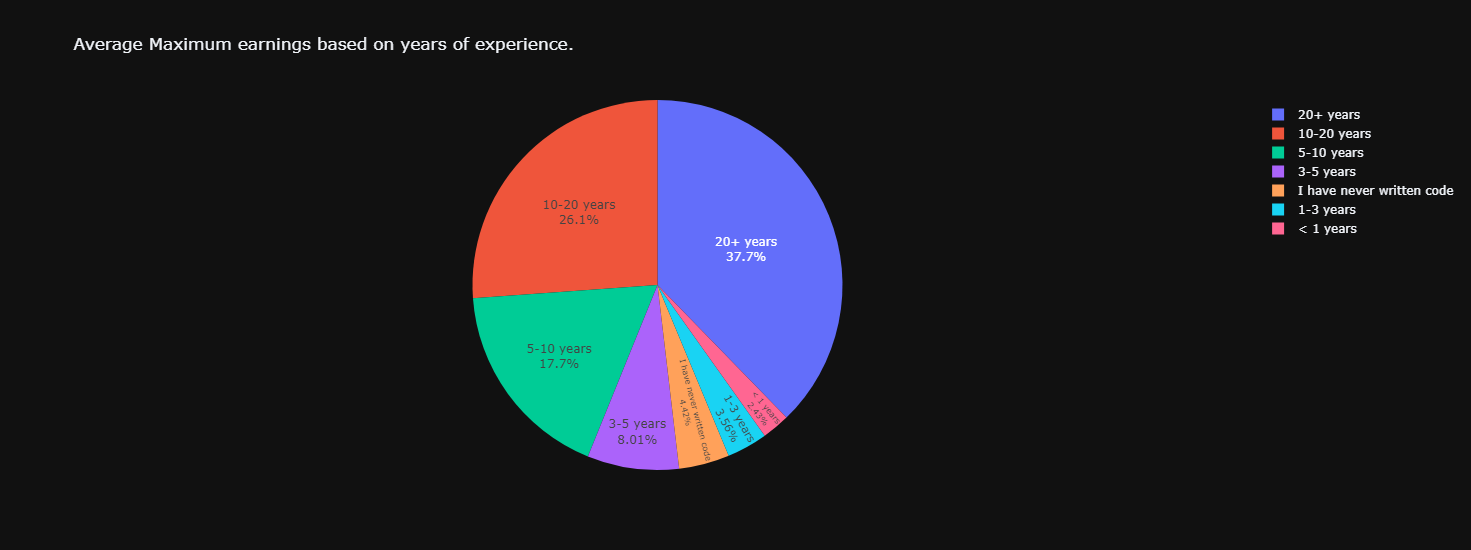

In [57]:
fig = px.pie(df_group_maximums, 
             values="Max_average", 
             names="Years Of Coding experience", 
             title="Average Maximum earnings based on years of experience.", 
             template="plotly_dark", 
             width=1000, 
             height=550)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

In [58]:
merged_min_max = df_group_minimums.merge(df_group_maximums, how="inner", on="Years Of Coding experience")
merged_min_max

Years Of Coding experience   Min_average   Max_average
0                  20+ years  64603.122967  83907.586207
1                10-20 years  47752.082177  58124.292615
2                 5-10 years  31621.674491  39439.792254
3                  3-5 years  14178.140630  17818.110621
4  I have never written code   8301.423662   9830.789396
5                  1-3 years   6629.509212   7910.750271
6                  < 1 years   4738.907224   5409.397690

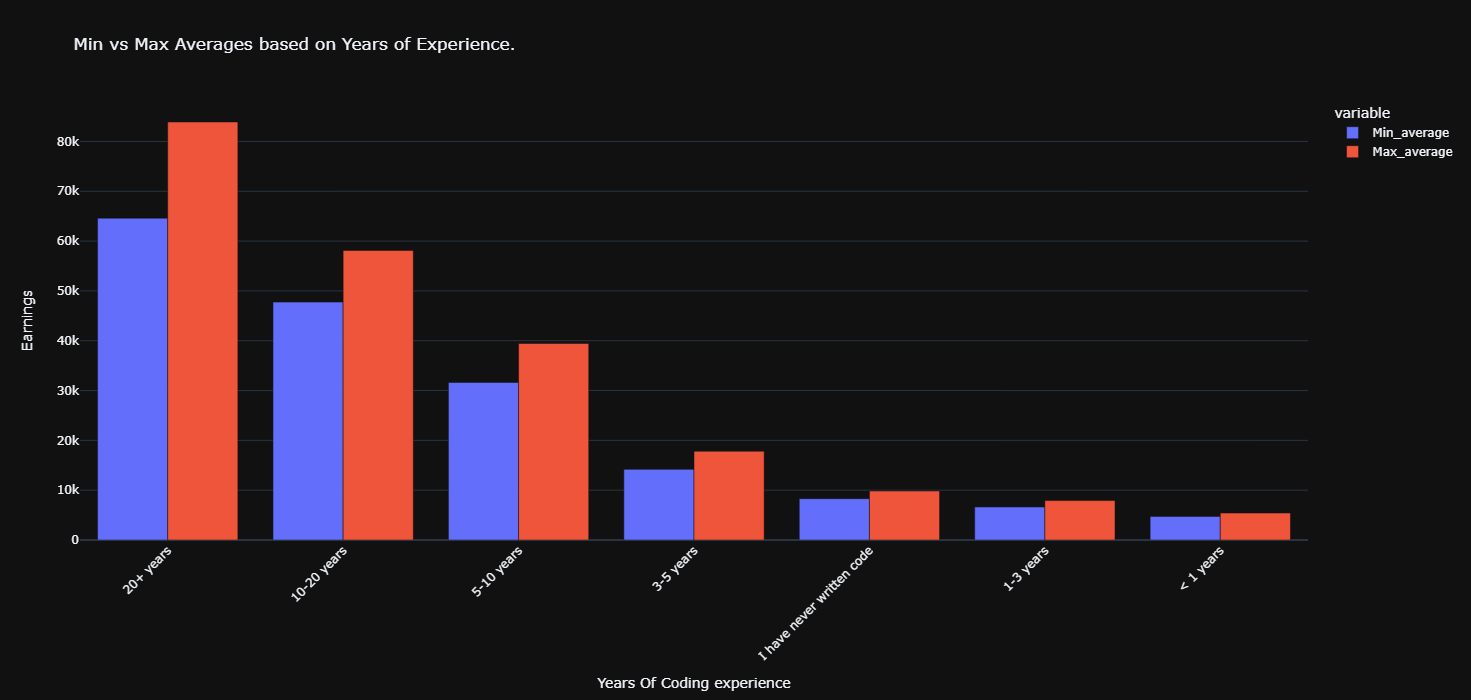

In [59]:
fig = px.bar(merged_min_max, 
             x="Years Of Coding experience", 
             y=["Min_average", "Max_average"], 
             barmode="group", 
             title="Min vs Max Averages based on Years of Experience.", 
             height=700, 
             width=1000, 
             template="plotly_dark", 
             labels={"value":"Earnings"})

fig.update_layout(xaxis_tickangle=-45)

fig.show()

In [60]:
mixed_earners_non_earners.head()

Q2   Q3       Q4          Q11            Q29  Minimum_earnings  \
1  30-34  Man    India            0              0                 0   
2  30-34  Man  Algeria    1-3 years              0                 0   
3  18-21  Man    Egypt    1-3 years              0                 0   
4  55-59  Man   France  10-20 years  25,000-29,999             25000   
5  45-49  Man    India   5-10 years              0                 0   

   Maximum_earnings  
1                 0  
2                 0  
3                 0  
4             29999  
5                 0

In [61]:
df_group = (
    mixed_earners_non_earners
    .groupby(["Q3", "Q4", "Q11"], as_index=False)
    .agg({"Minimum_earnings":"mean", "Maximum_earnings":"mean"})
    .sort_values(by="Maximum_earnings", ascending=False))

earning_group = df_group[df_group["Maximum_earnings"] != 0]
earning_group.head()

Q3                        Q4  \
438                      Man                  Zimbabwe   
627  Prefer to self-describe  United States of America   
481                Nonbinary  United States of America   
22                       Man                 Australia   
406                      Man      United Arab Emirates   

                           Q11  Minimum_earnings  Maximum_earnings  
438                  20+ years     250000.000000     499999.500000  
627                  20+ years     225000.000000     349999.000000  
481                  20+ years     162500.000000     237499.250000  
22   I have never written code     121428.571429     203571.000000  
406                  20+ years     117142.857143     197499.285714

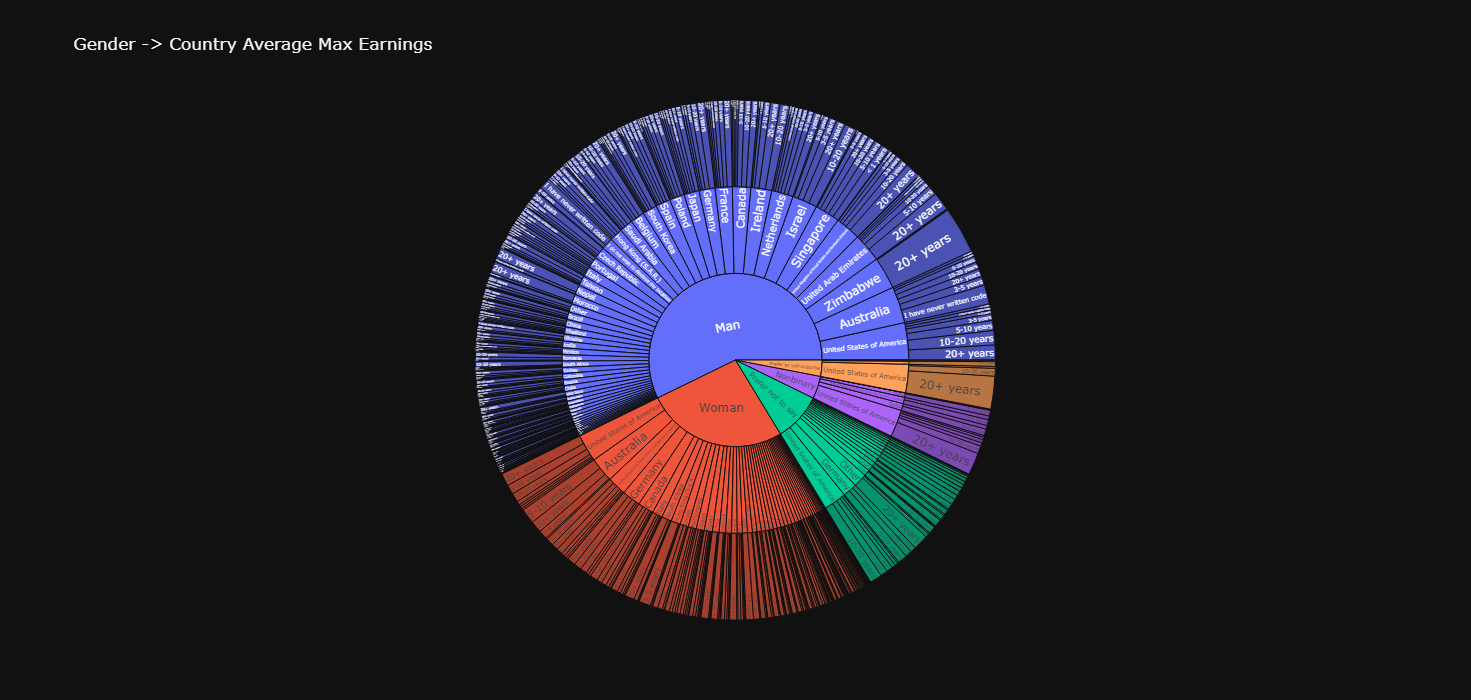

In [62]:
fig = px.sunburst(earning_group, 
                  path=["Q3", "Q4", "Q11"], 
                  values="Maximum_earnings", 
                  template="plotly_dark", 
                  height=700, 
                  title="Gender -> Country Average Max Earnings")

fig.show()

**Work on a country Chloropeth**

In [63]:
ide_questions = list(data.columns[data.columns.str.startswith("Q13")])
ide_questions

['Q13_1',
 'Q13_2',
 'Q13_3',
 'Q13_4',
 'Q13_5',
 'Q13_6',
 'Q13_7',
 'Q13_8',
 'Q13_9',
 'Q13_10',
 'Q13_11',
 'Q13_12',
 'Q13_13',
 'Q13_14']

In [64]:
df_ide = data[ide_questions].fillna(0)
df_ide

Q13_1  \
0      Which of the following integrated development ...   
1                                                      0   
2                                                      0   
3                                            JupyterLab    
4                                                      0   
...                                                  ...   
23993                                                  0   
23994                                                  0   
23995                                                  0   
23996                                                  0   
23997                                                  0   

                                                   Q13_2  \
0      Which of the following integrated development ...   
1                                                      0   
2                                                      0   
3                                                      0   
4                                                      0   
...                                                  ...   
23993                                           RStudio    
23994                                                  0   
23995                                                  0   
23996                                           RStudio    
23997                                                  0   

                                                   Q13_3  \
0      Which of the following integrated development ...   
1                                                      0   
2                                                      0   
3                                                      0   
4                                                      0   
...                                                  ...   
23993                                                  0   
23994                                                  0   
23995                                                  0   
23996                                                  0   
23997                                                  0   

                                                   Q13_4  \
0      Which of the following integrated development ...   
1                                                      0   
2                                                      0   
3                                                      0   
4                           Visual Studio Code (VSCode)    
...                                                  ...   
23993                       Visual Studio Code (VSCode)    
23994                                                  0   
23995                                                  0   
23996                                                  0   
23997                       Visual Studio Code (VSCode)    

                                                   Q13_5  \
0      Which of the following integrated development ...   
1                                                      0   
2                                                      0   
3                                                      0   
4                                                      0   
...                                                  ...   
23993                                           PyCharm    
23994                                                  0   
23995                                           PyCharm    
23996                                           PyCharm    
23997                                                  0   

                                                   Q13_6  \
0      Which of the following integrated development ...   
1                                                      0   
2                                                      0   
3                                                      0   
4                                                      0   
...                                                  ...   
23993                     

In [65]:
ide_exploration = pd.concat([intro_df, df_ide], axis=1).iloc[1:,]

In [66]:
ide_exploration.head()

Duration (in seconds)     Q2   Q3       Q4   Q5        Q13_1 Q13_2 Q13_3  \
1                   121  30-34  Man    India   No            0     0     0   
2                   462  30-34  Man  Algeria   No            0     0     0   
3                   293  18-21  Man    Egypt  Yes  JupyterLab      0     0   
4                   851  55-59  Man   France   No            0     0     0   
5                   232  45-49  Man    India  Yes            0     0     0   

                           Q13_4      Q13_5       Q13_6          Q13_7  \
1                              0          0           0              0   
2                              0          0           0    Notepad++     
3                              0          0           0              0   
4   Visual Studio Code (VSCode)           0           0              0   
5   Visual Studio Code (VSCode)    PyCharm     Spyder      Notepad++     

              Q13_8            Q13_9 Q13_10             Q13_11 Q13_12 Q13_13  \
1                 0                0      0                  0      0      0   
2                 0                0      0                  0      0      0   
3                 0                0      0   Jupyter Notebook      0      0   
4    Sublime Text      Vim / Emacs        0   Jupyter Notebook      0      0   
5                 0                0      0                  0      0      0   

  Q13_14  
1      0  
2  Other  
3      0  
4      0  
5      0

In [67]:
ide_exploration.groupby("Q2").agg({"Q13_1": "count"})

Q13_1
Q2          
18-21   4559
22-24   4283
25-29   4472
30-34   2972
35-39   2353
40-44   1927
45-49   1253
50-54    914
55-59    611
60-69    526
70+      127

In [68]:
ides = list(data[ide_questions].iloc[0].str.split().str.get(-1))
ides

['JupyterLab',
 'RStudio',
 'Studio',
 '(VSCode)',
 'PyCharm',
 'Spyder',
 'Notepad++',
 'Text',
 'Emacs',
 'MATLAB',
 'Notebook',
 'IntelliJ',
 'None',
 'Other']

In [69]:
dict(zip(ide_questions, ides))

{'Q13_1': 'JupyterLab',
 'Q13_2': 'RStudio',
 'Q13_3': 'Studio',
 'Q13_4': '(VSCode)',
 'Q13_5': 'PyCharm',
 'Q13_6': 'Spyder',
 'Q13_7': 'Notepad++',
 'Q13_8': 'Text',
 'Q13_9': 'Emacs',
 'Q13_10': 'MATLAB',
 'Q13_11': 'Notebook',
 'Q13_12': 'IntelliJ',
 'Q13_13': 'None',
 'Q13_14': 'Other'}

In [70]:
ide_exploration.rename(columns=dict(zip(ide_questions, ides)), inplace=True)

In [71]:
with open("simpler_countries.json", encoding="utf-8") as geo:
    text = geo.readlines()
    file = json.loads(text[0])

print(file["features"][0]["properties"]["iso_a3"])

CRI


In [72]:
country_names = [file["features"][i]["properties"]["admin"] for i in range(len(file["features"]))]
len(country_names)

168

In [73]:
iso_codes = [file["features"][i]["properties"]["iso_a3"] for i in range(len(file["features"]))]
len(iso_codes)

168

In [74]:
country_with_iso_codes = dict(zip(country_names, iso_codes))

In [75]:
country_with_iso_codes[data.iloc[23994]["Q4"]]

'USA'

In [76]:
geo_data = {"Q4":country_names, "iso":iso_codes}
df_geo_data = pd.DataFrame(geo_data)

In [77]:
df_with_iso = data.merge(df_geo_data, how="inner", on="Q4")

In [78]:
gender_country = df_with_iso[['Q2', 'Q3', 'Q4', 'iso']]
gender_country

Q2     Q3       Q4  iso
0      30-34    Man    India  IND
1      45-49    Man    India  IND
2      18-21  Woman    India  IND
3      18-21    Man    India  IND
4      35-39    Man    India  IND
...      ...    ...      ...  ...
21613  25-29  Woman  Ireland  IRL
21614  35-39    Man  Ireland  IRL
21615  30-34    Man  Ireland  IRL
21616  40-44    Man  Ireland  IRL
21617  30-34    Man  Ireland  IRL

[21618 rows x 4 columns]

In [79]:
men = gender_country[gender_country["Q3"].eq("Man")]
women = gender_country[gender_country["Q3"].eq("Woman")]

In [80]:
men_group_by_country = (
    men
    .groupby(["Q4", "iso"], as_index=False)
    .agg({"Q3":"count"})
    .rename(columns={"Q3":"Men", "Q4":"Country"})
    .sort_values(by="Men", ascending=False))
men_group_by_country.head()

Country  iso   Men
16                     India  IND  6488
47  United States of America  USA  2047
4                     Brazil  BRA   706
28                   Nigeria  NGA   548
29                  Pakistan  PAK   512

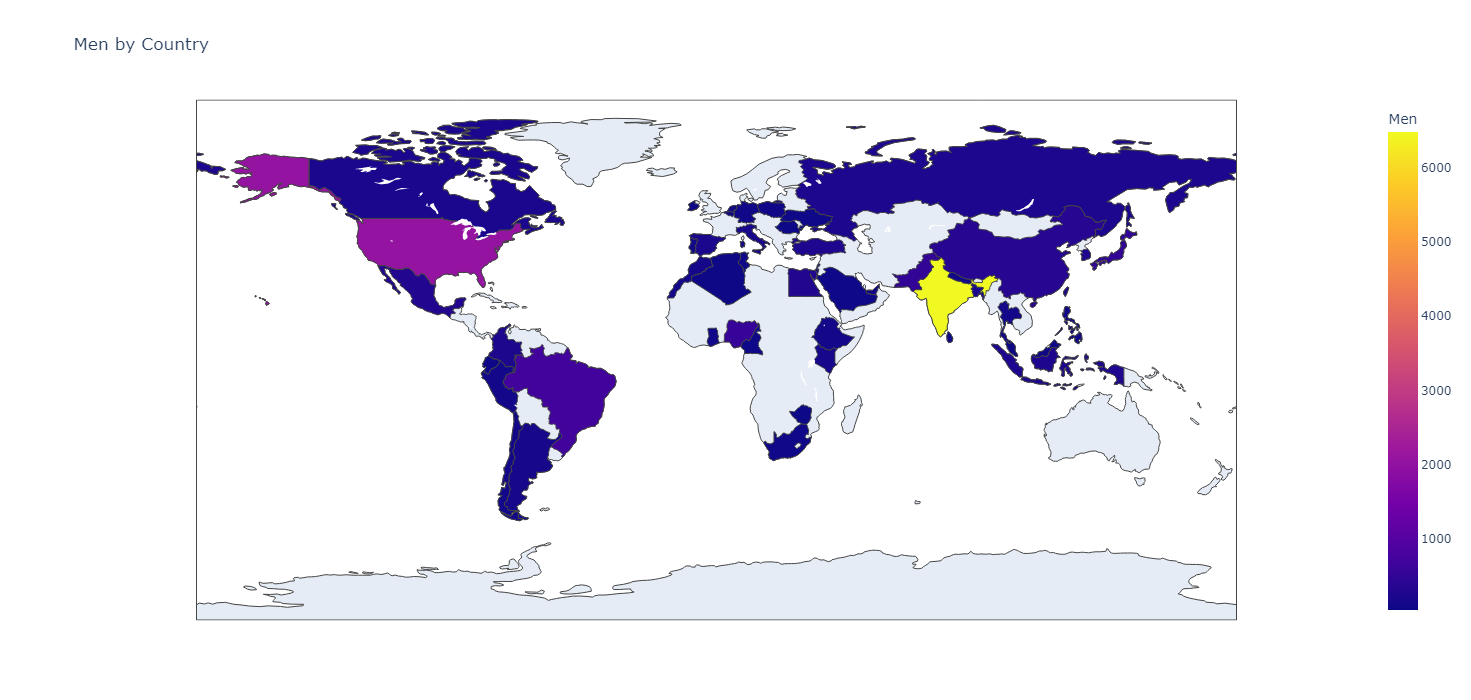

In [81]:
fig = px.choropleth(men_group_by_country, 
                    locations="iso", 
                    color="Men", 
                    hover_name="Country", 
                    title="Men by Country", 
                    height=700, 
                    width=1000, 
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [82]:
women_group_by_country = (
    women
    .groupby(["Q4", "iso"], as_index=False)
    .agg({"Q3":"count"})
    .rename(columns={"Q3":"Women", "Q4":"Country"})
    .sort_values(by="Women", ascending=False))
women_group_by_country.head()

Country  iso  Women
16                     India  IND   2179
47  United States of America  USA    773
28                   Nigeria  NGA    177
4                     Brazil  BRA    118
29                  Pakistan  PAK    103

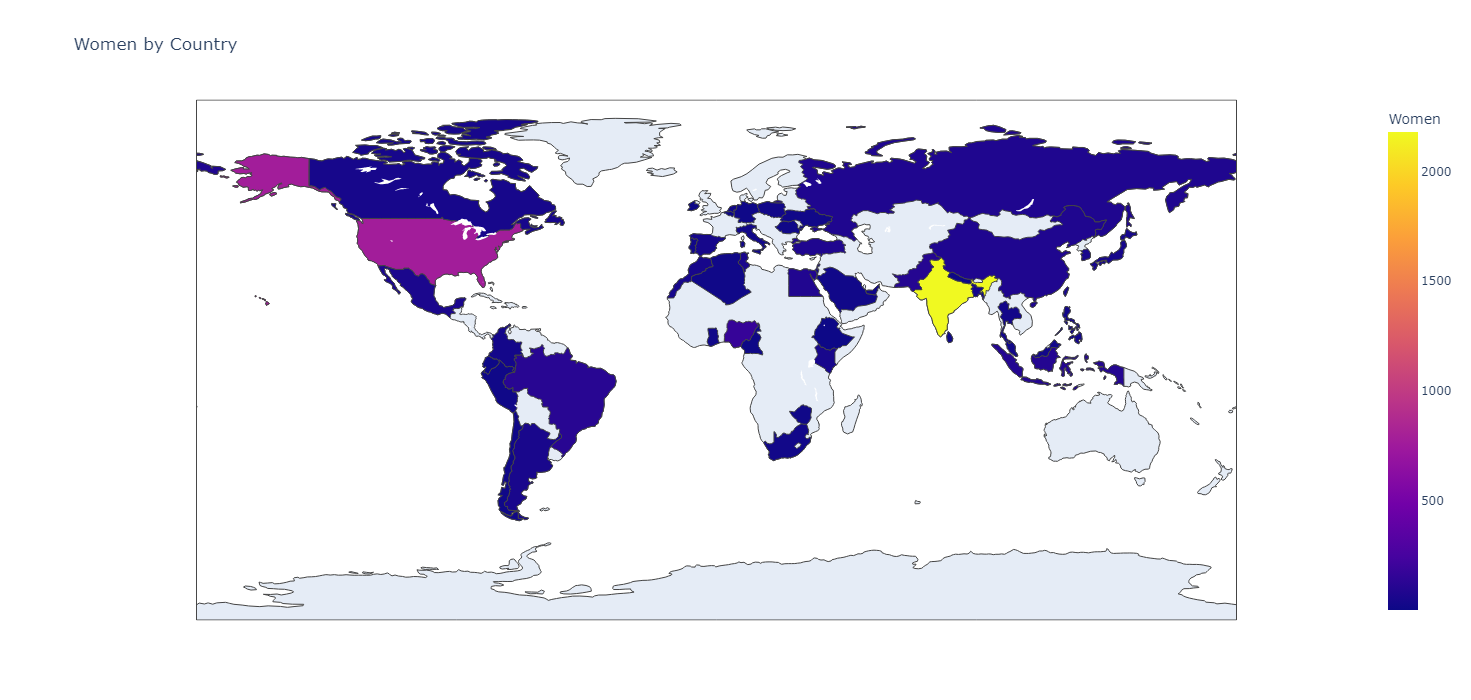

In [83]:
fig = px.choropleth(women_group_by_country, 
                    locations="iso", 
                    color="Women", 
                    hover_name="Country", 
                    title="Women by Country", 
                    height=700, 
                    width=1000, 
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

**This was nice to explore but does not really add a lot of insight.**

In [84]:
women_and_men = women_group_by_country.merge(men_group_by_country, how="inner", on="Country").drop(columns="iso_y")
women_and_men.head()

Country iso_x  Women   Men
0                     India   IND   2179  6488
1  United States of America   USA    773  2047
2                   Nigeria   NGA    177   548
3                    Brazil   BRA    118   706
4                  Pakistan   PAK    103   512

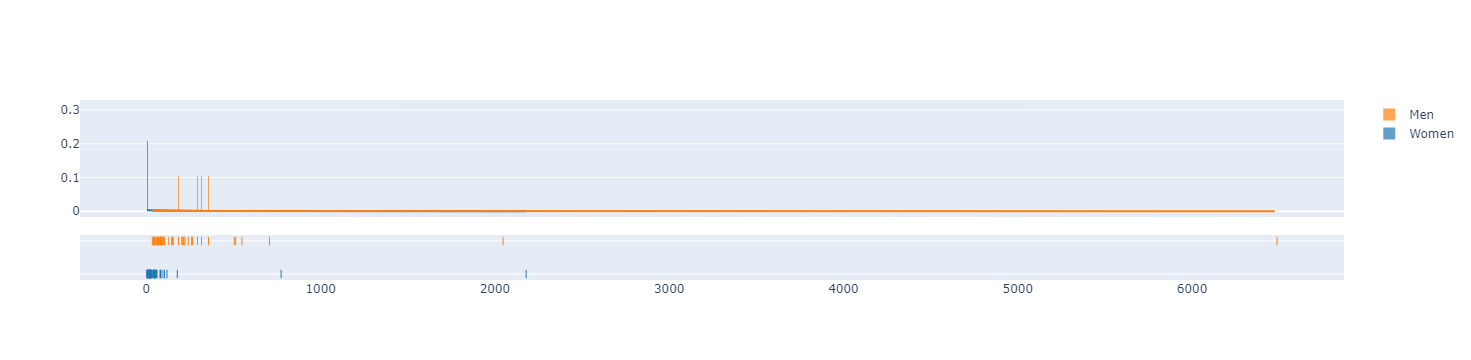

In [85]:
hist_data = [women_and_men["Women"], women_and_men["Men"]]
group_labels = ["Women", "Men"]

fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

fig.show()

In [86]:
ide_columns = ['JupyterLab', 'RStudio', 'Studio', '(VSCode)', 'PyCharm', 'Spyder', 'Notepad++', 'Text', 
                 'Emacs', 'MATLAB', 'Notebook', 'IntelliJ', 'None', 'Other']

for i in ide_columns:
    ide_exploration[i] = ide_exploration[i].str.strip().fillna(0)

In [87]:
ide_exploration

Duration (in seconds)     Q2     Q3                        Q4   Q5  \
1                       121  30-34    Man                     India   No   
2                       462  30-34    Man                   Algeria   No   
3                       293  18-21    Man                     Egypt  Yes   
4                       851  55-59    Man                    France   No   
5                       232  45-49    Man                     India  Yes   
...                     ...    ...    ...                       ...  ...   
23993                   331  22-24    Man  United States of America  Yes   
23994                   330  60-69    Man  United States of America  Yes   
23995                   860  25-29    Man                    Turkey   No   
23996                   597  35-39  Woman                    Israel   No   
23997                   303  18-21    Man                     India  Yes   

       JupyterLab  RStudio Studio                     (VSCode)  PyCharm  \
1               0        0      0                            0        0   
2               0        0      0                            0        0   
3      JupyterLab        0      0                            0        0   
4               0        0      0  Visual Studio Code (VSCode)        0   
5               0        0      0  Visual Studio Code (VSCode)  PyCharm   
...           ...      ...    ...                          ...      ...   
23993           0  RStudio      0  Visual Studio Code (VSCode)  PyCharm   
23994           0        0      0                            0        0   
23995           0        0      0                            0  PyCharm   
23996           0  RStudio      0                            0  PyCharm   
23997           0        0      0  Visual Studio Code (VSCode)        0   

       Spyder  Notepad++          Text        Emacs MATLAB          Notebook  \
1           0          0             0            0      0                 0   
2           0  Notepad++             0            0      0                 0   
3           0          0             0            0      0  Jupyter Notebook   
4           0          0  Sublime Text  Vim / Emacs      0  Jupyter Notebook   
5      Spyder  Notepad++             0            0      0                 0   
...       ...        ...           ...          ...    ...               ...   
23993       0  Notepad++             0            0      0  Jupyter Notebook   
23994       0          0             0            0      0                 0   
23995  Spyder          0             0            0      0  Jupyter Notebook   
23996       0  Notepad++             0            0      0                 0   
23997       0          0             0            0      0  Jupyter Notebook   

      IntelliJ None  Other  
1            0    0      0  
2            0    0  Other  
3            0    0      0  
4            0    0      0  
5            0    0      0  
...        ...  ...    ...  
23993        0    0      0  
23994        0    0  Other  
23995        0    0      0  
23996        0    0      0  
23997        0    0      0  

[23997 rows x 19 columns]

In [88]:
melted_df = ide_exploration[['Q4','JupyterLab', 'RStudio', 'Studio', '(VSCode)', 'PyCharm', 'Spyder', 
                 'Notepad++', 'Text', 'Emacs', 'MATLAB', 'Notebook', 'IntelliJ', 'None', 'Other']].melt(id_vars='Q4', value_vars=['JupyterLab', 'RStudio', 'Studio', '(VSCode)', 'PyCharm', 'Spyder', 'Notepad++', 'Text', 
                 'Emacs', 'MATLAB', 'Notebook', 'IntelliJ', 'None', 'Other'])

melted_df["values"] = melted_df["value"].ne(0)

In [89]:
melted_df

Q4    variable       value  values
0                          India  JupyterLab           0   False
1                        Algeria  JupyterLab           0   False
2                          Egypt  JupyterLab  JupyterLab    True
3                         France  JupyterLab           0   False
4                          India  JupyterLab           0   False
...                          ...         ...         ...     ...
335953  United States of America       Other           0   False
335954  United States of America       Other       Other    True
335955                    Turkey       Other           0   False
335956                    Israel       Other           0   False
335957                     India       Other           0   False

[335958 rows x 4 columns]

In [115]:
ide_popularity = (melted_df.pivot_table(index="variable", values="values", aggfunc="sum").rename(columns={"values":"Totals"}).sort_values(by="Totals", ascending=False))
ide_popularity

Totals
variable          
Notebook     13684
(VSCode)      9976
PyCharm       6099
JupyterLab    4887
Studio        4416
Notepad++     3891
RStudio       3824
Spyder        2880
MATLAB        2302
Text          2218
IntelliJ      1612
Other         1474
Emacs         1448
None           409

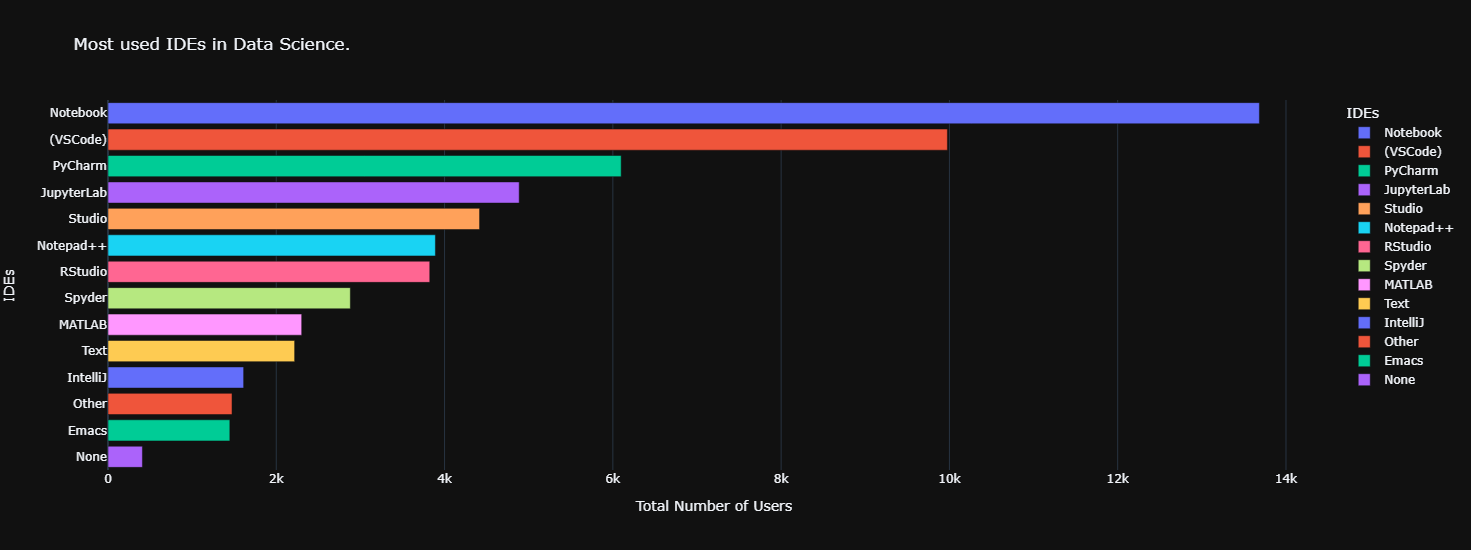

In [119]:
fig = px.bar(ide_popularity, 
             y=ide_popularity.index, 
             x="Totals", 
             title="Most used IDEs in Data Science.", 
             height=550, 
             width=1000, 
             color=ide_popularity.index, 
             labels={"Totals":"Total Number of Users", "variable":"IDEs"}, template="plotly_dark")

fig.show()

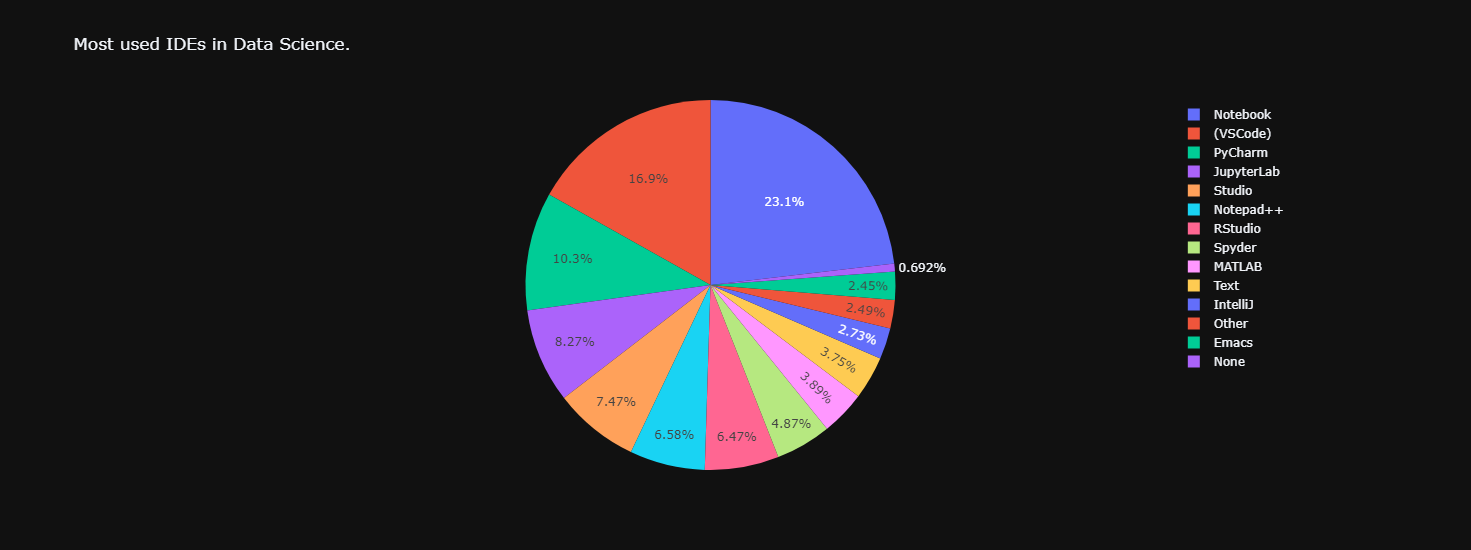

In [120]:
fig = px.pie(ide_popularity, 
             names=ide_popularity.index, 
             values="Totals", 
             title="Most used IDEs in Data Science.", 
             height=550, 
             width=1000, 
             color=ide_popularity.index, 
             labels={"Totals":"Total Number of Users", "variable":"IDEs"}, template="plotly_dark")

fig.show()

I am not surprised about the Notebook but I am surprised that so many people use VSCode in Data science.

In [137]:
plotting_columns = [column for column in data.columns if column.startswith("Q15")]

In [138]:
plotting_columns

['Q15_1',
 'Q15_2',
 'Q15_3',
 'Q15_4',
 'Q15_5',
 'Q15_6',
 'Q15_7',
 'Q15_8',
 'Q15_9',
 'Q15_10',
 'Q15_11',
 'Q15_12',
 'Q15_13',
 'Q15_14',
 'Q15_15']

In [156]:
plotters = list(data[plotting_columns].iloc[0].str.split('-').str.get(-1).str.strip())

In [158]:
dict(zip(plotting_columns, plotters))

{'Q15_1': 'Matplotlib',
 'Q15_2': 'Seaborn',
 'Q15_3': 'Plotly / Plotly Express',
 'Q15_4': 'Ggplot / ggplot2',
 'Q15_5': 'Shiny',
 'Q15_6': 'D3 js',
 'Q15_7': 'Altair',
 'Q15_8': 'Bokeh',
 'Q15_9': 'Geoplotlib',
 'Q15_10': 'Leaflet / Folium',
 'Q15_11': 'Pygal',
 'Q15_12': 'Dygraphs',
 'Q15_13': 'Highcharter',
 'Q15_14': 'None',
 'Q15_15': 'Other'}

In [172]:
df_plotters = data[plotting_columns].rename(columns=dict(zip(plotting_columns, plotters))).iloc[1:].fillna(0)
ranked_visualization_libs = pd.DataFrame(df_plotters.ne(0).sum(), columns=["Totals"]).sort_values(by="Totals", ascending=False)
ranked_visualization_libs

Totals
Matplotlib                14010
Seaborn                   10512
Plotly / Plotly Express    5078
Ggplot / ggplot2           4145
None                       3439
Geoplotlib                 1167
Shiny                      1043
Bokeh                       771
D3 js                       734
Other                       691
Leaflet / Folium            554
Pygal                       318
Altair                      300
Dygraphs                    225
Highcharter                 198

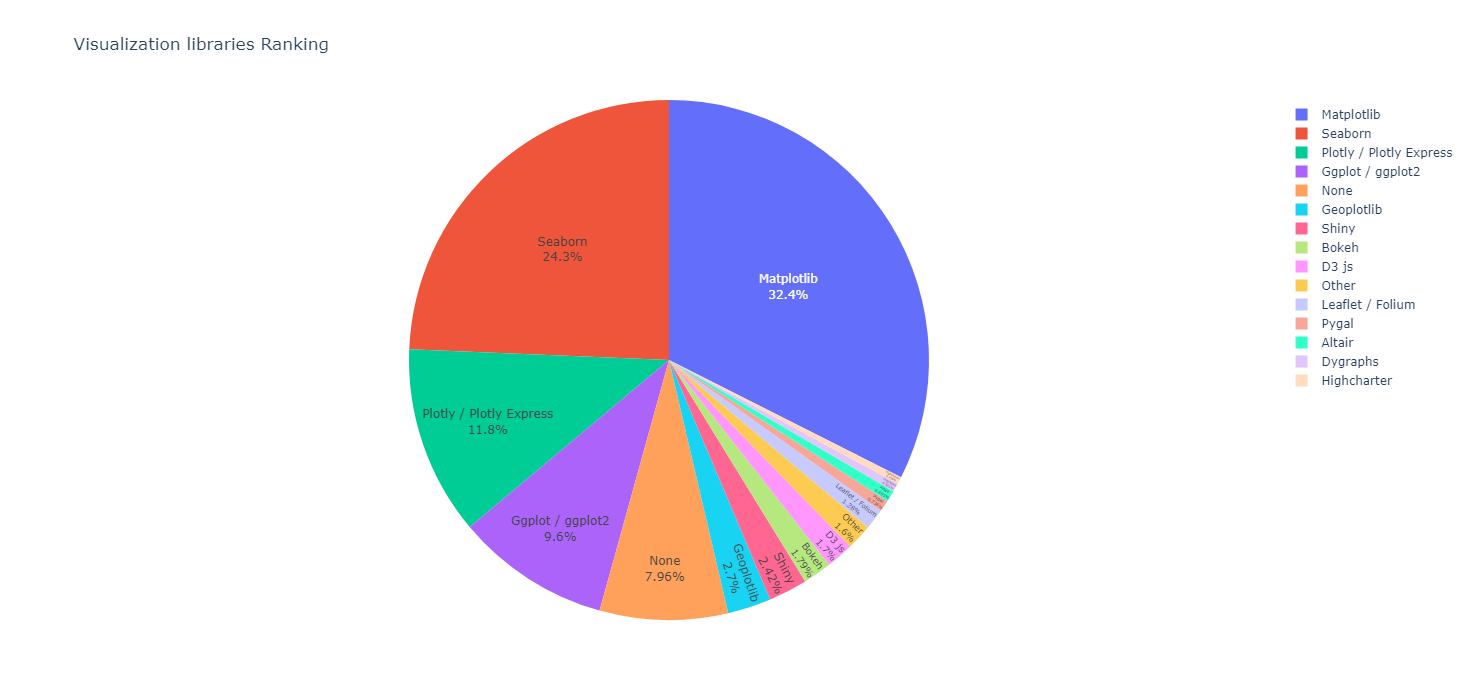

In [184]:
fig = px.pie(ranked_visualization_libs, names=ranked_visualization_libs.index, values="Totals", title="Visualization libraries Ranking", height=700, width=1400)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

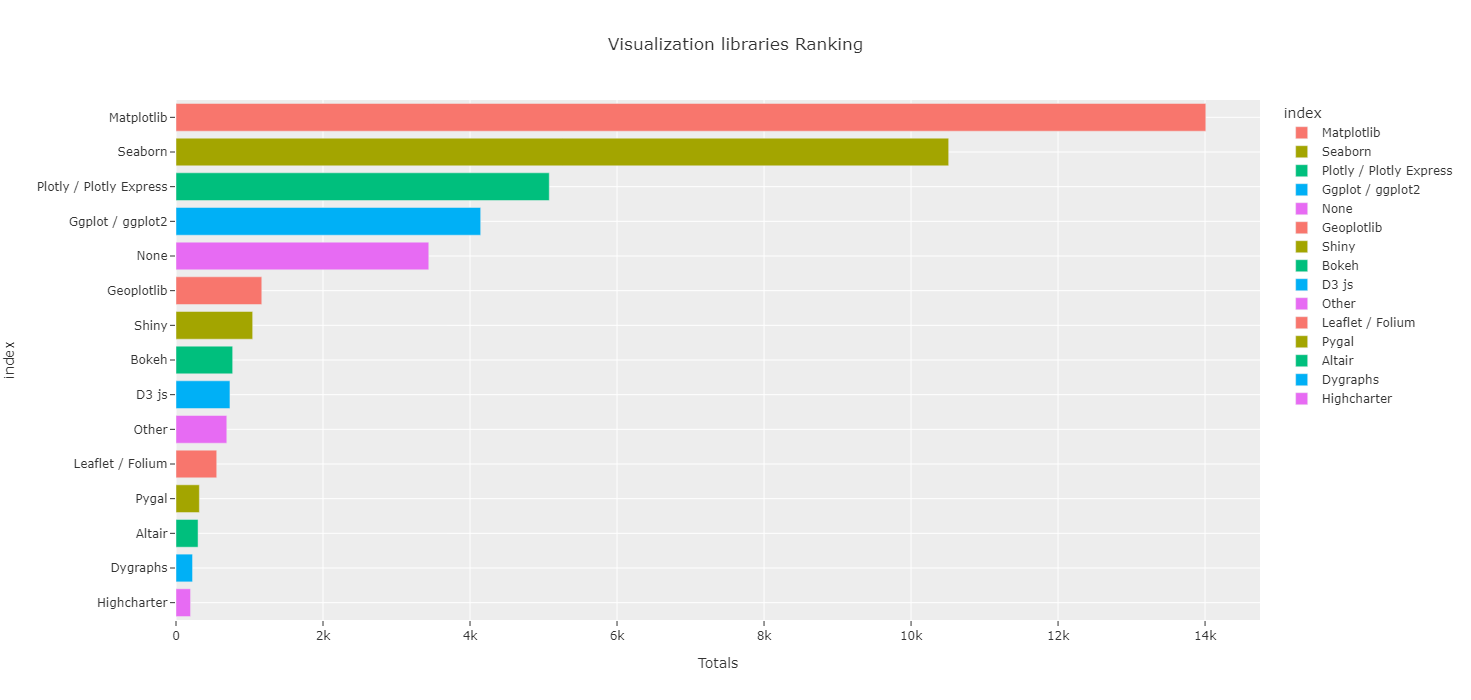

In [188]:
fig = px.bar(ranked_visualization_libs, 
             y=ranked_visualization_libs.index, 
             x="Totals", 
             title="Visualization libraries Ranking", 
             height=700, 
             width=1400, 
             color=ranked_visualization_libs.index, template="ggplot2")

fig.show()

Now That I know that Matplotlib is the most used. I am going to use Matplotlib for the remaining figures.

In [189]:
ml_frameworks_columns = [column for column in data.columns if column.startswith("Q17")]

In [190]:
ml_frameworks_columns

['Q17_1',
 'Q17_2',
 'Q17_3',
 'Q17_4',
 'Q17_5',
 'Q17_6',
 'Q17_7',
 'Q17_8',
 'Q17_9',
 'Q17_10',
 'Q17_11',
 'Q17_12',
 'Q17_13',
 'Q17_14',
 'Q17_15']

In [203]:
framework_names = list(data[ml_frameworks_columns].iloc[0].str.split("- ",).str.get(-1).str.strip())

In [204]:
dict(zip(ml_frameworks_columns, framework_names))

{'Q17_1': 'Scikit-learn',
 'Q17_2': 'TensorFlow',
 'Q17_3': 'Keras',
 'Q17_4': 'PyTorch',
 'Q17_5': 'Fast.ai',
 'Q17_6': 'Xgboost',
 'Q17_7': 'LightGBM',
 'Q17_8': 'CatBoost',
 'Q17_9': 'Caret',
 'Q17_10': 'Tidymodels',
 'Q17_11': 'JAX',
 'Q17_12': 'PyTorch Lightning',
 'Q17_13': 'Huggingface',
 'Q17_14': 'None',
 'Q17_15': 'Other'}

In [209]:
df_frameworks = (
    data[ml_frameworks_columns].iloc[1:,]
    .rename(columns=dict(zip(ml_frameworks_columns, framework_names)))
    .fillna(0))
df_frameworks.head()

Scikit-learn     TensorFlow Keras    PyTorch Fast.ai    Xgboost  \
1                0              0     0          0       0          0   
2    Scikit-learn     TensorFlow      0   PyTorch        0          0   
3    Scikit-learn               0     0   PyTorch        0   Xgboost    
4    Scikit-learn               0     0   PyTorch        0          0   
5                0              0     0          0       0          0   

  LightGBM CatBoost Caret Tidymodels JAX    PyTorch Lightning    Huggingface  \
1        0        0     0          0   0                    0              0   
2        0        0     0          0   0                    0              0   
3        0        0     0          0   0   PyTorch Lightning               0   
4        0        0     0          0   0                    0   Huggingface    
5        0        0     0          0   0                    0              0   

  None Other  
1    0     0  
2    0     0  
3    0     0  
4    0     0  
5    0     0

In [229]:
ranked_ml_frameworks = pd.DataFrame(df_frameworks.ne(0).sum(), columns=["Totals"]).sort_values(by="Totals")
ranked_ml_frameworks

Totals
JAX                   252
Tidymodels            547
Other                 620
Fast.ai               648
Caret                 821
PyTorch Lightning    1013
CatBoost             1165
Huggingface          1332
None                 1709
LightGBM             1940
Xgboost              4477
PyTorch              5191
Keras                6575
TensorFlow           7953
Scikit-learn        11403

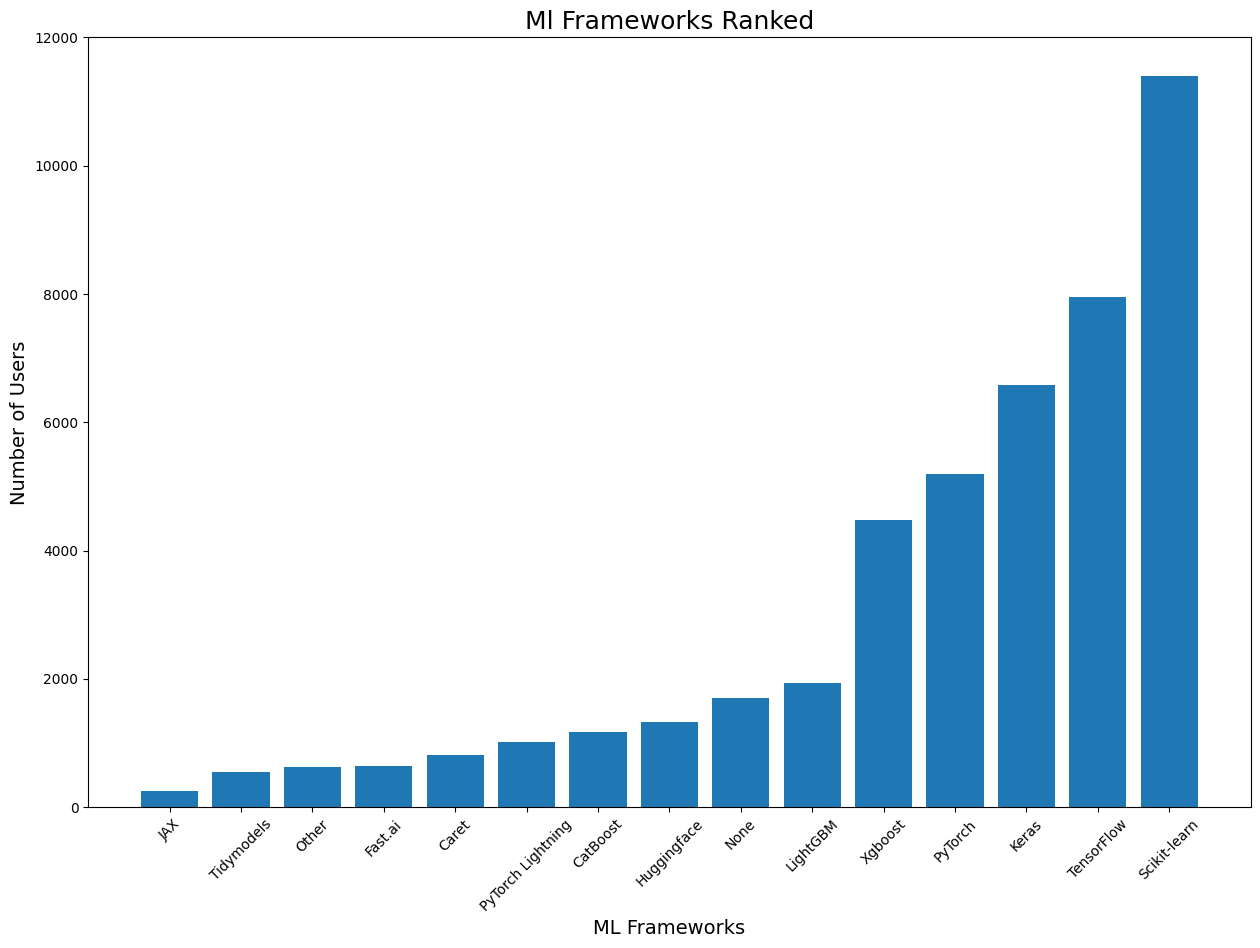

In [230]:
plt.figure(figsize=(15,10))

plt.xticks(rotation=45)
plt.ylim(0, 12000)
plt.xlabel("ML Frameworks", fontsize=14)
plt.ylabel("Number of Users", fontsize=14)
plt.title("Ml Frameworks Ranked", fontsize=18)

plt.bar(x=ranked_ml_frameworks.index, height=ranked_ml_frameworks["Totals"])

plt.show()

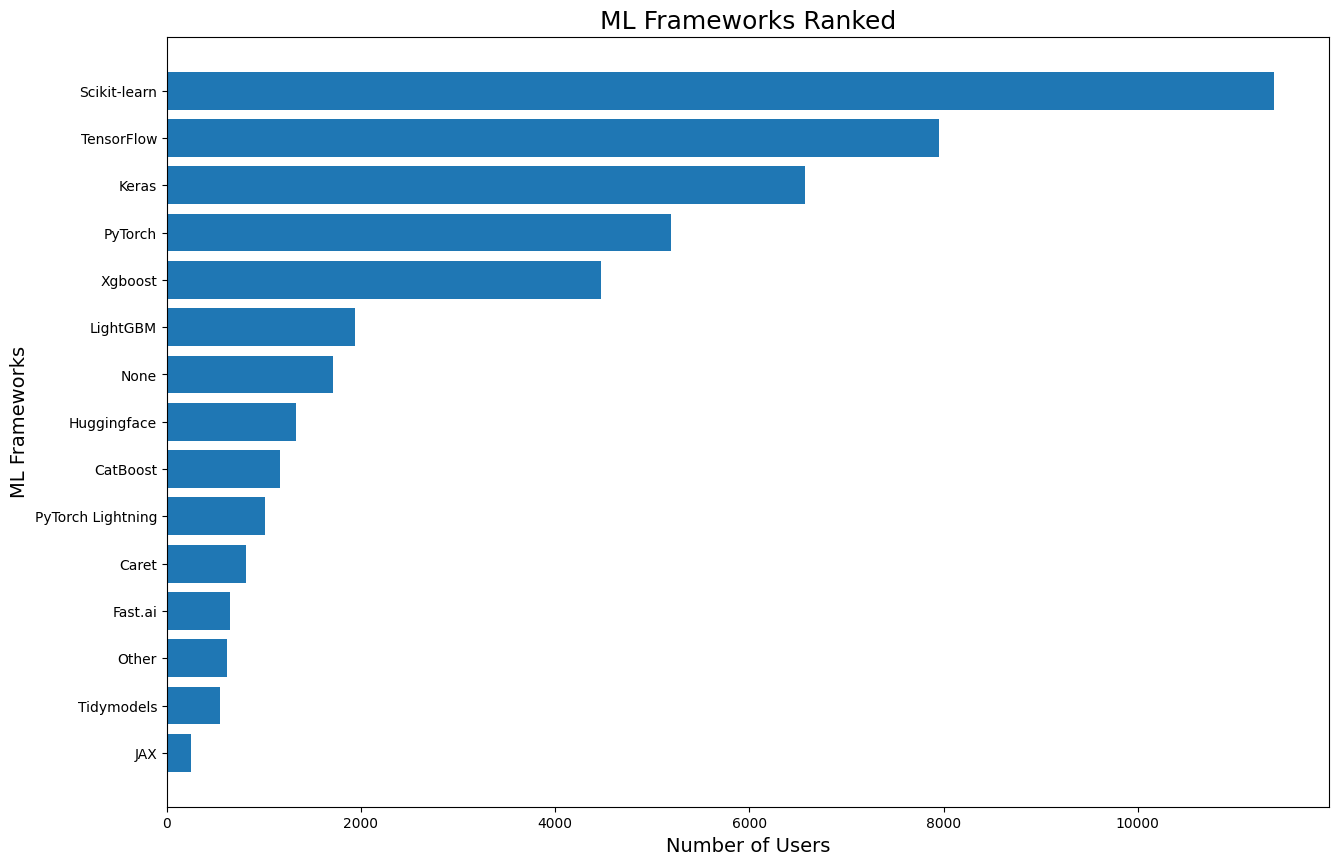

In [269]:
plt.figure(figsize=(15,10))

plt.xlabel("Number of Users", fontsize=14)
plt.ylabel("ML Frameworks", fontsize=14)
plt.title("ML Frameworks Ranked", fontsize=18)

plt.barh(y=ranked_ml_frameworks.index, width=ranked_ml_frameworks["Totals"])

plt.show()

In [240]:
algorithms_columns = [column for column in data.columns if column.startswith("Q18")]
algorithms_columns

['Q18_1',
 'Q18_2',
 'Q18_3',
 'Q18_4',
 'Q18_5',
 'Q18_6',
 'Q18_7',
 'Q18_8',
 'Q18_9',
 'Q18_10',
 'Q18_11',
 'Q18_12',
 'Q18_13',
 'Q18_14']

In [249]:
algorithm_names = list(data[algorithms_columns].iloc[0].str.split("- ").str.get(-1).str.strip())
algorithm_names

['Linear or Logistic Regression',
 'Decision Trees or Random Forests',
 'Gradient Boosting Machines (xgboost, lightgbm, etc)',
 'Bayesian Approaches',
 'Evolutionary Approaches',
 'Dense Neural Networks (MLPs, etc)',
 'Convolutional Neural Networks',
 'Generative Adversarial Networks',
 'Recurrent Neural Networks',
 'Transformer Networks (BERT, gpt-3, etc)',
 'Autoencoder Networks (DAE, VAE, etc)',
 'Graph Neural Networks',
 'None',
 'Other']

In [250]:
dict(zip(algorithms_columns, algorithm_names))

{'Q18_1': 'Linear or Logistic Regression',
 'Q18_2': 'Decision Trees or Random Forests',
 'Q18_3': 'Gradient Boosting Machines (xgboost, lightgbm, etc)',
 'Q18_4': 'Bayesian Approaches',
 'Q18_5': 'Evolutionary Approaches',
 'Q18_6': 'Dense Neural Networks (MLPs, etc)',
 'Q18_7': 'Convolutional Neural Networks',
 'Q18_8': 'Generative Adversarial Networks',
 'Q18_9': 'Recurrent Neural Networks',
 'Q18_10': 'Transformer Networks (BERT, gpt-3, etc)',
 'Q18_11': 'Autoencoder Networks (DAE, VAE, etc)',
 'Q18_12': 'Graph Neural Networks',
 'Q18_13': 'None',
 'Q18_14': 'Other'}

In [258]:
ranked_ml_algorithms = (pd.DataFrame(data[algorithms_columns]
                                     .rename(columns=dict(zip(algorithms_columns, algorithm_names)))
                                     .fillna(0)
                                     .iloc[1:,]
                                     .ne(0)
                                     .sum(), columns=["Totals"]).sort_values(by="Totals"))
ranked_ml_algorithms

Totals
Other                                                  538
Evolutionary Approaches                                823
Generative Adversarial Networks                       1166
Autoencoder Networks (DAE, VAE, etc)                  1234
None                                                  1326
Graph Neural Networks                                 1422
Transformer Networks (BERT, gpt-3, etc)               2196
Recurrent Neural Networks                             3451
Dense Neural Networks (MLPs, etc)                     3476
Bayesian Approaches                                   3661
Gradient Boosting Machines (xgboost, lightgbm, ...    5506
Convolutional Neural Networks                         6006
Decision Trees or Random Forests                      9373
Linear or Logistic Regression                        11338

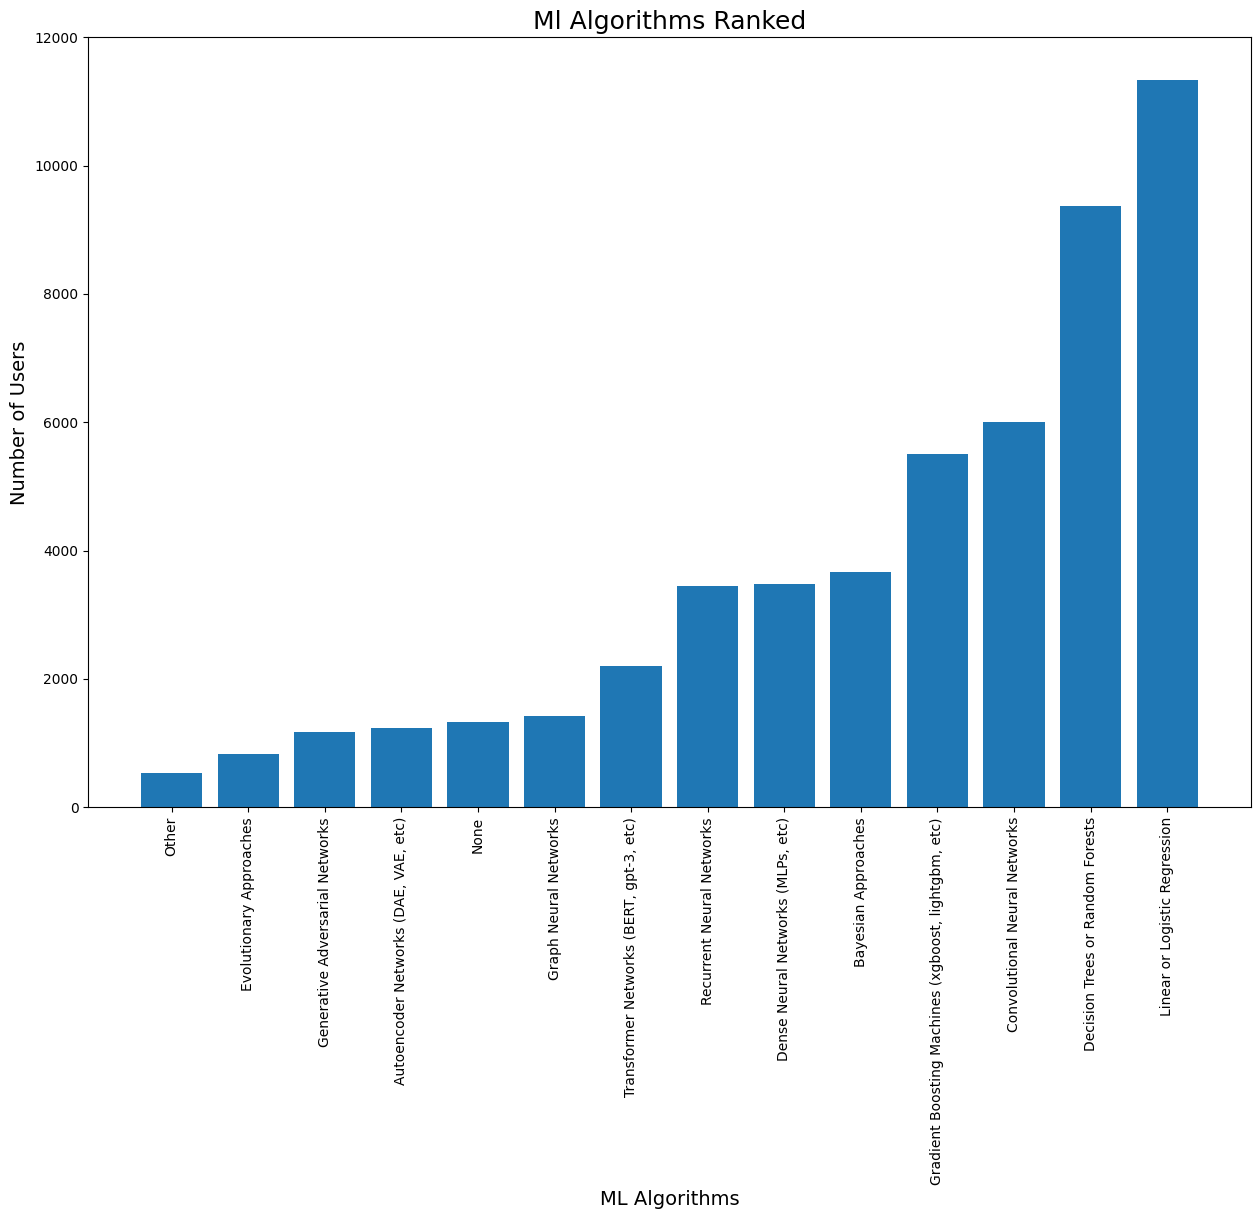

In [264]:
plt.figure(figsize=(15,10))

plt.xticks(rotation=90)
plt.ylim(0, 12000)
plt.xlabel("ML Algorithms", fontsize=14)
plt.ylabel("Number of Users", fontsize=14)
plt.title("Ml Algorithms Ranked", fontsize=18)

plt.bar(x=ranked_ml_algorithms.index, height=ranked_ml_algorithms["Totals"])

plt.show()

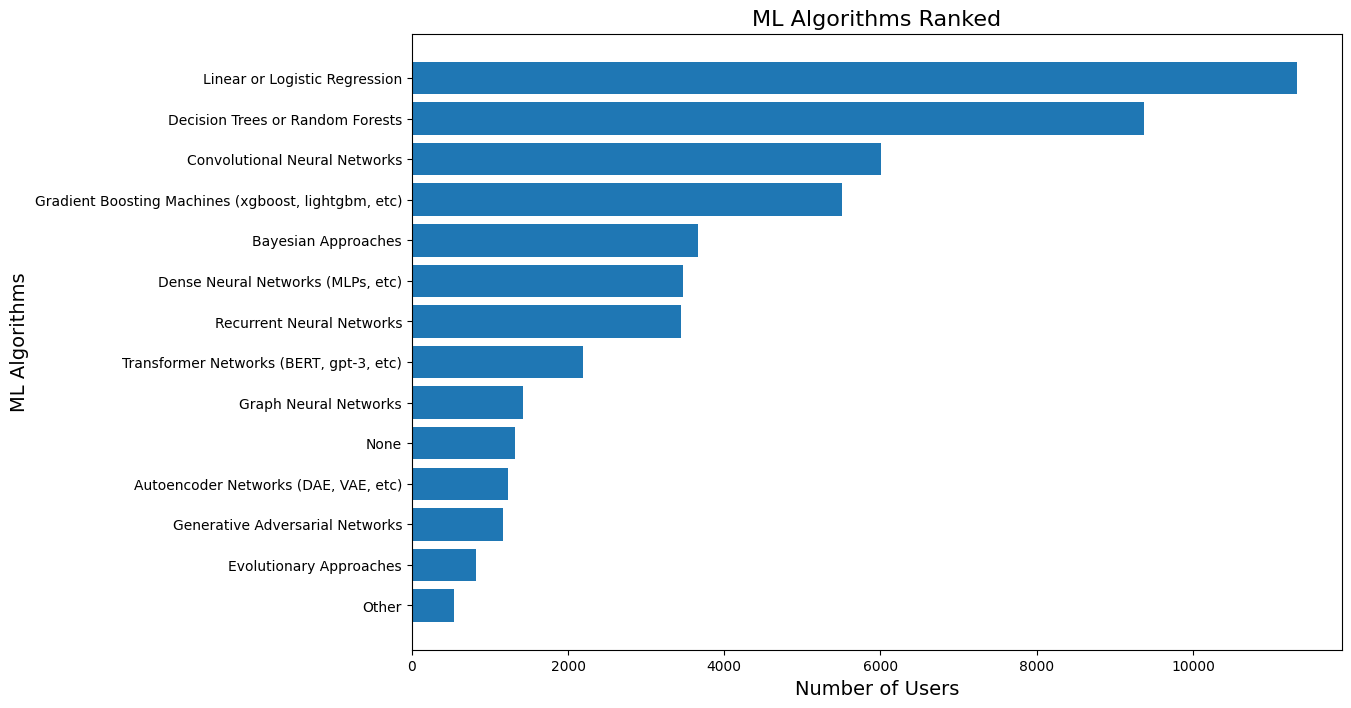

In [268]:
plt.figure(figsize=(12,8))

plt.xlabel("Number of Users", fontsize=14)
plt.ylabel("ML Algorithms", fontsize=14)
plt.title("ML Algorithms Ranked", fontsize=16)

plt.barh(y=ranked_ml_algorithms.index, width=ranked_ml_algorithms["Totals"])

plt.show()

In [271]:
[column for column in data.columns if column.startswith("Q23")]

['Q23']

In [290]:
ranked_roles = pd.DataFrame(data["Q23"].fillna(0).value_counts().iloc[1:-1]).rename(columns={"Q23":"Totals"})
ranked_roles

Totals
Data Scientist                                        1929
Data Analyst (Business, Marketing, Financial, Q...    1538
Currently not employed                                1432
Software Engineer                                      980
Teacher / professor                                    833
Manager (Program, Project, Operations, Executiv...     832
Other                                                  754
Research Scientist                                     593
Machine Learning/ MLops Engineer                       571
Engineer (non-software)                                465
Data Engineer                                          352
Statistician                                           125
Data Architect                                          95
Data Administrator                                      70
Developer Advocate                                      61

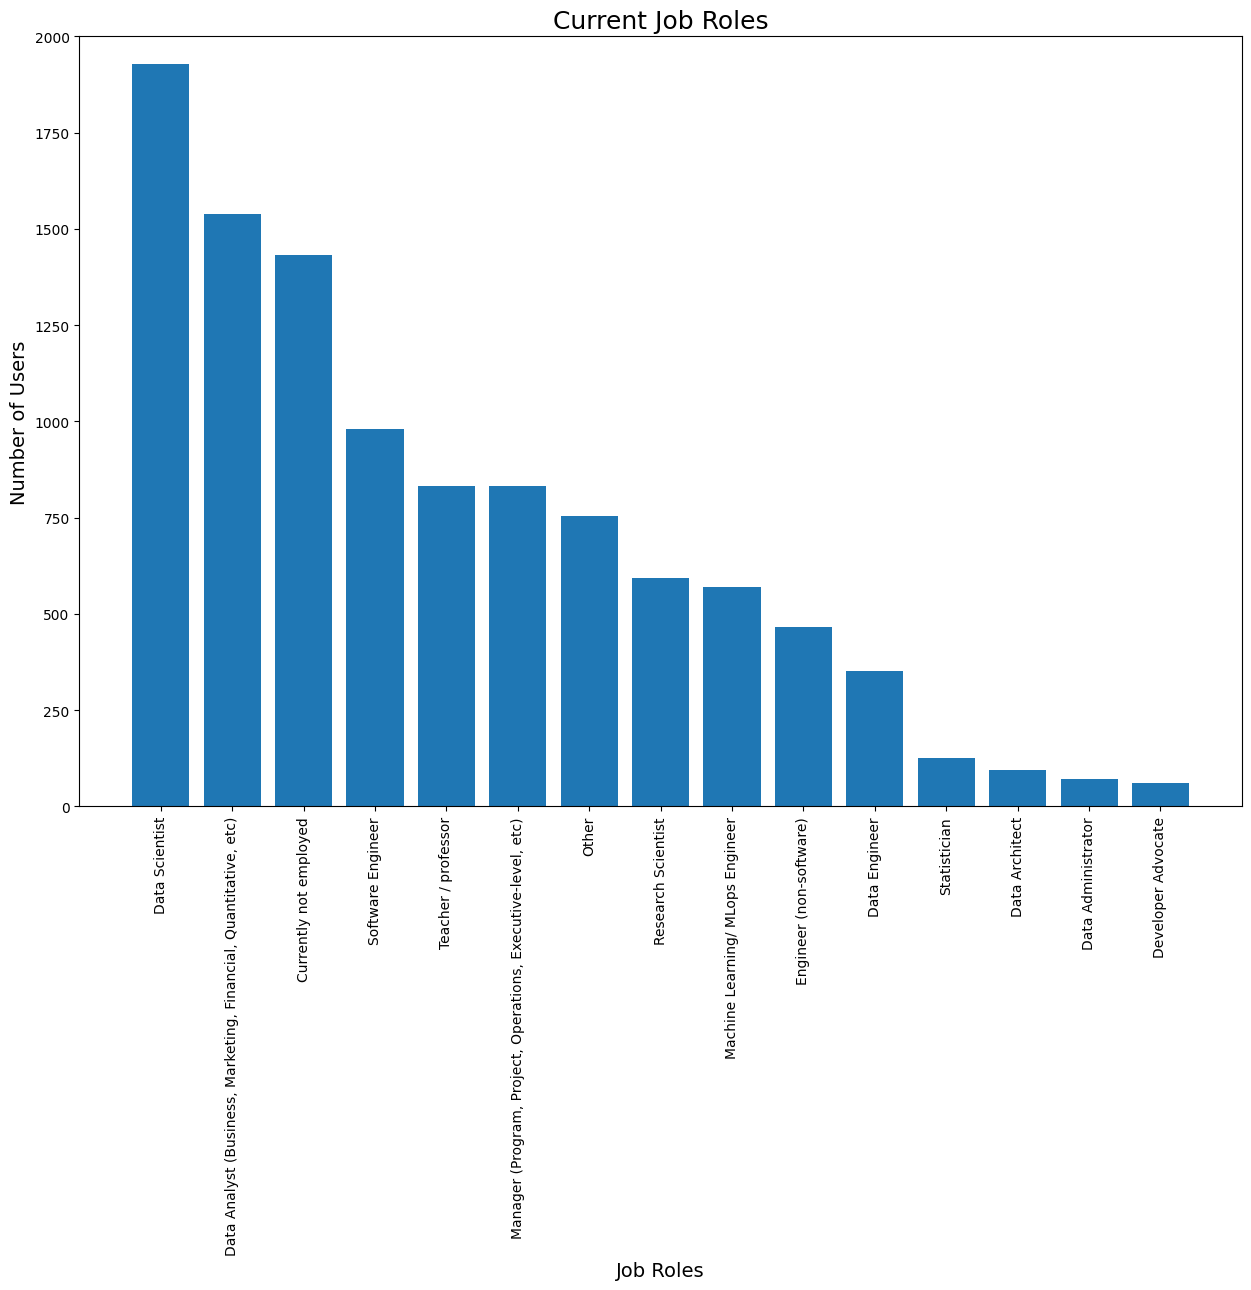

In [295]:
plt.figure(figsize=(15,10))

plt.xticks(rotation=90)
plt.ylim(0, 2000)
plt.xlabel("Job Roles", fontsize=14)
plt.ylabel("Number of Users", fontsize=14)
plt.title("Current Job Roles", fontsize=18)

plt.bar(x=ranked_roles.index, height=ranked_roles["Totals"])

plt.show()

In [299]:
sorted_ranked_roles = ranked_roles.copy()
sorted_ranked_roles = sorted_ranked_roles.sort_values(by="Totals")
sorted_ranked_roles

Totals
Developer Advocate                                      61
Data Administrator                                      70
Data Architect                                          95
Statistician                                           125
Data Engineer                                          352
Engineer (non-software)                                465
Machine Learning/ MLops Engineer                       571
Research Scientist                                     593
Other                                                  754
Manager (Program, Project, Operations, Executiv...     832
Teacher / professor                                    833
Software Engineer                                      980
Currently not employed                                1432
Data Analyst (Business, Marketing, Financial, Q...    1538
Data Scientist                                        1929

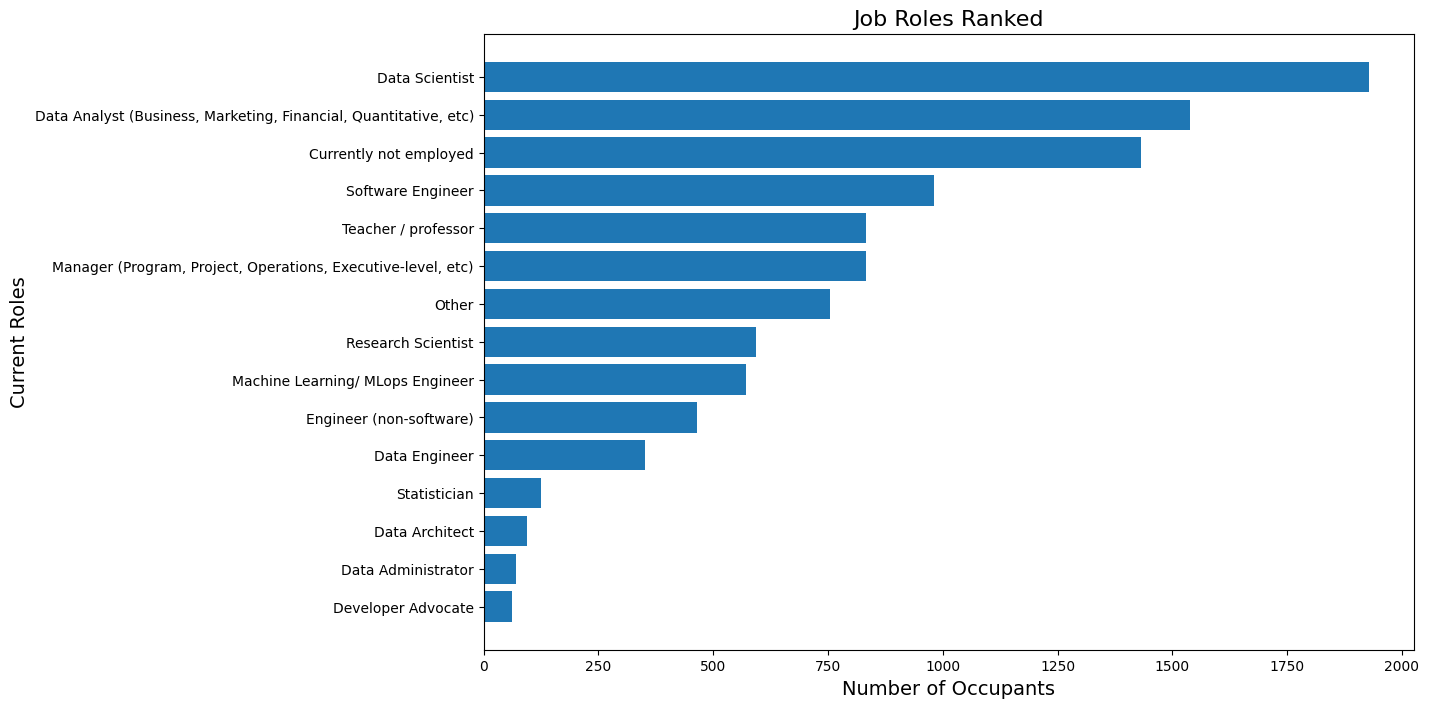

In [301]:
plt.figure(figsize=(12,8))

plt.xlabel("Number of Occupants", fontsize=14)
plt.ylabel("Current Roles", fontsize=14)
plt.title("Job Roles Ranked", fontsize=16)

plt.barh(y=sorted_ranked_roles.index, width=sorted_ranked_roles["Totals"])

plt.show()

There seems to be a lot of people people who are either students or unemployed. A lot of data Scientists participated in this survey.

In [315]:
employers = pd.DataFrame(data["Q24"].iloc[1:,].fillna(0).value_counts()).rename(columns={"Q24":"Totals"}).iloc[1:,].sort_values(by="Totals")
employers.head()

Totals
Shipping/Transportation         150
Broadcasting/Communications     179
Non-profit/Service              194
Marketing/CRM                   246
Insurance/Risk Assessment       256

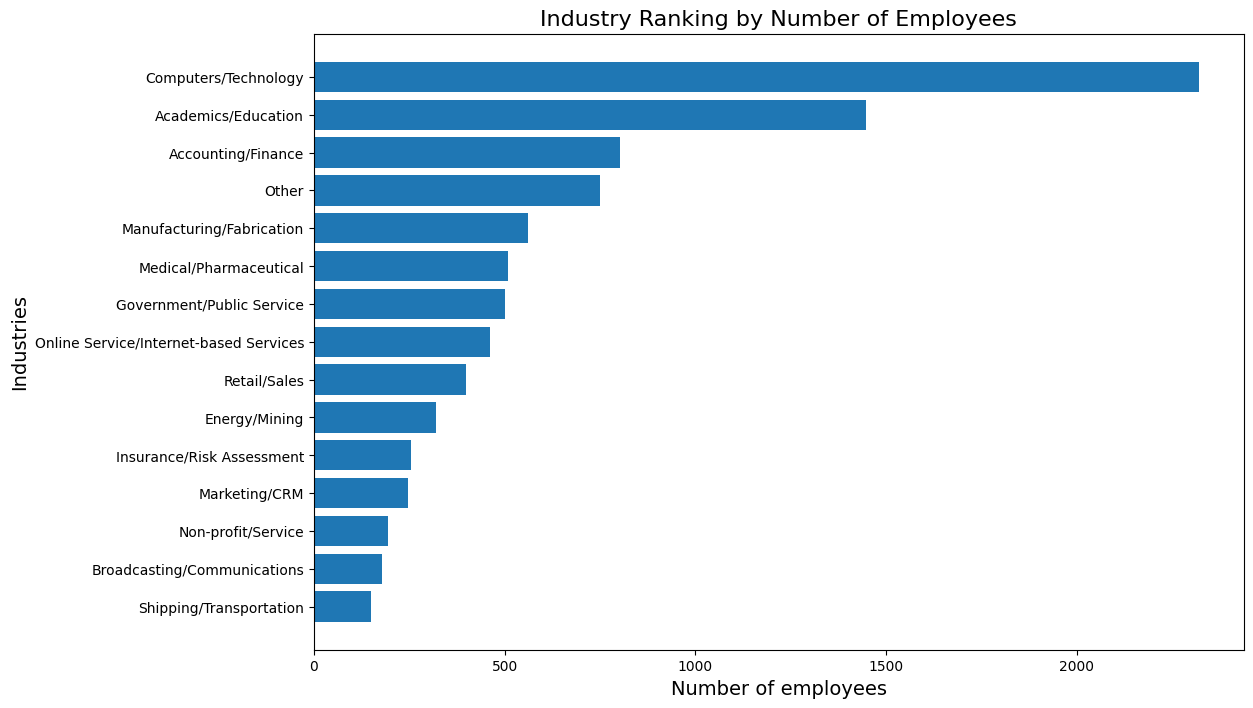

In [317]:
plt.figure(figsize=(12,8))

plt.xlabel("Number of employees", fontsize=14)
plt.ylabel("Industries", fontsize=14)
plt.title("Industry Ranking by Number of Employees", fontsize=16)

plt.barh(y=employers.index, width=employers["Totals"])

plt.show()

In [325]:
company_size = pd.DataFrame(data["Q25"].iloc[1:,].fillna(0).value_counts()).rename(columns={"Q25":"Totals"}).iloc[1:,].sort_values(by="Totals")

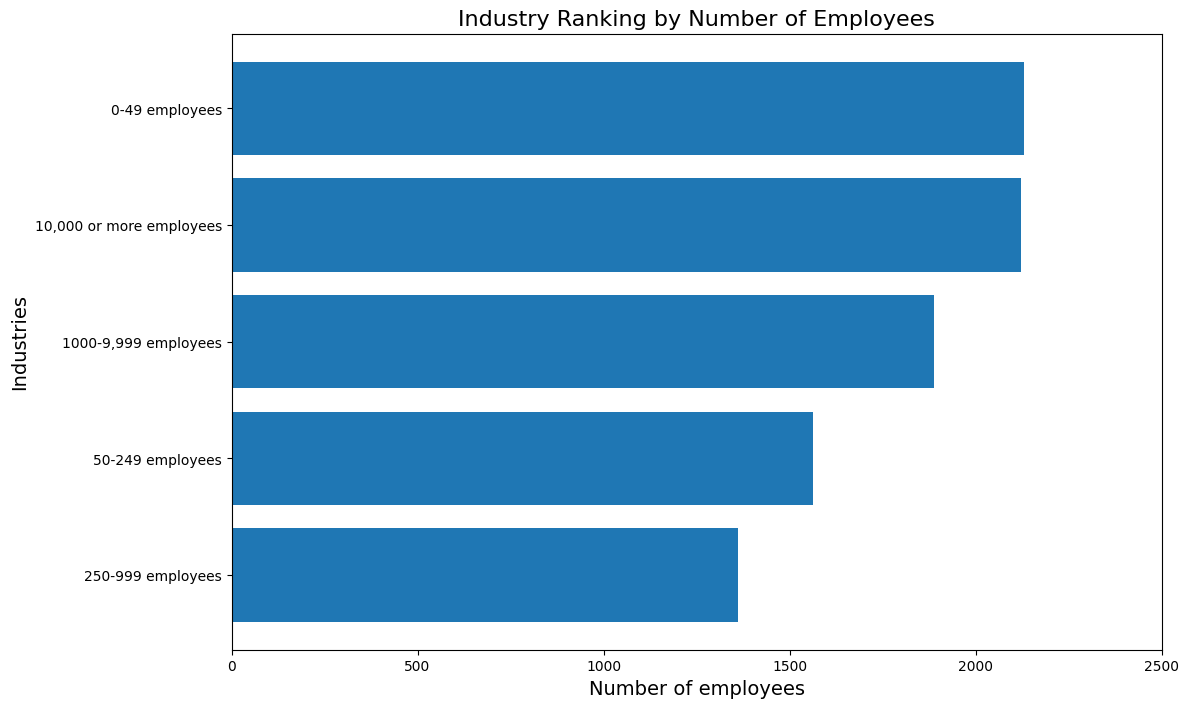

In [329]:
plt.figure(figsize=(12,8))

plt.xlabel("Number of employees", fontsize=14)
plt.ylabel("Industries", fontsize=14)
plt.title("Industry Ranking by Number of Employees", fontsize=16)
plt.xlim(0, 2500)

plt.barh(y=company_size.index, width=company_size["Totals"])

plt.show()

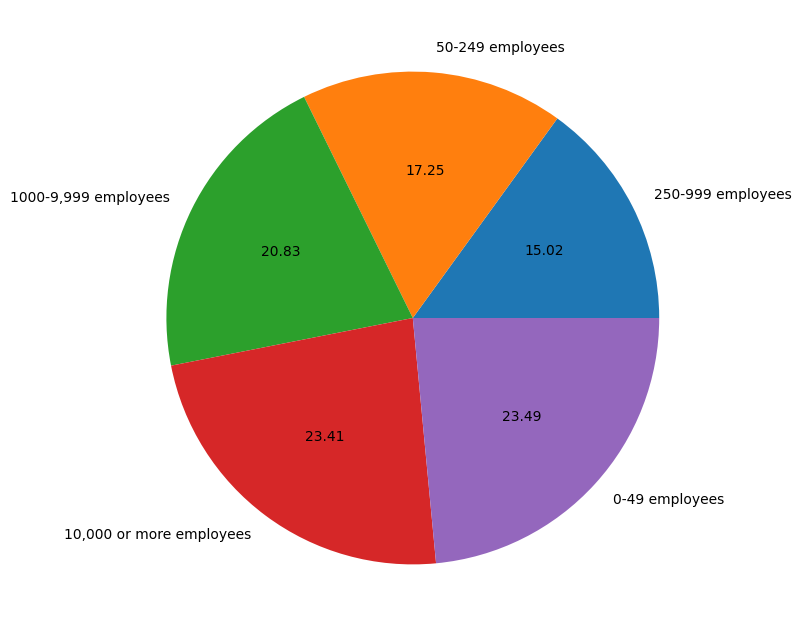

In [353]:
plt.figure(figsize=(12,8))

plt.pie(x=company_size["Totals"], labels=company_size.index, autopct="%.2f")

plt.show()

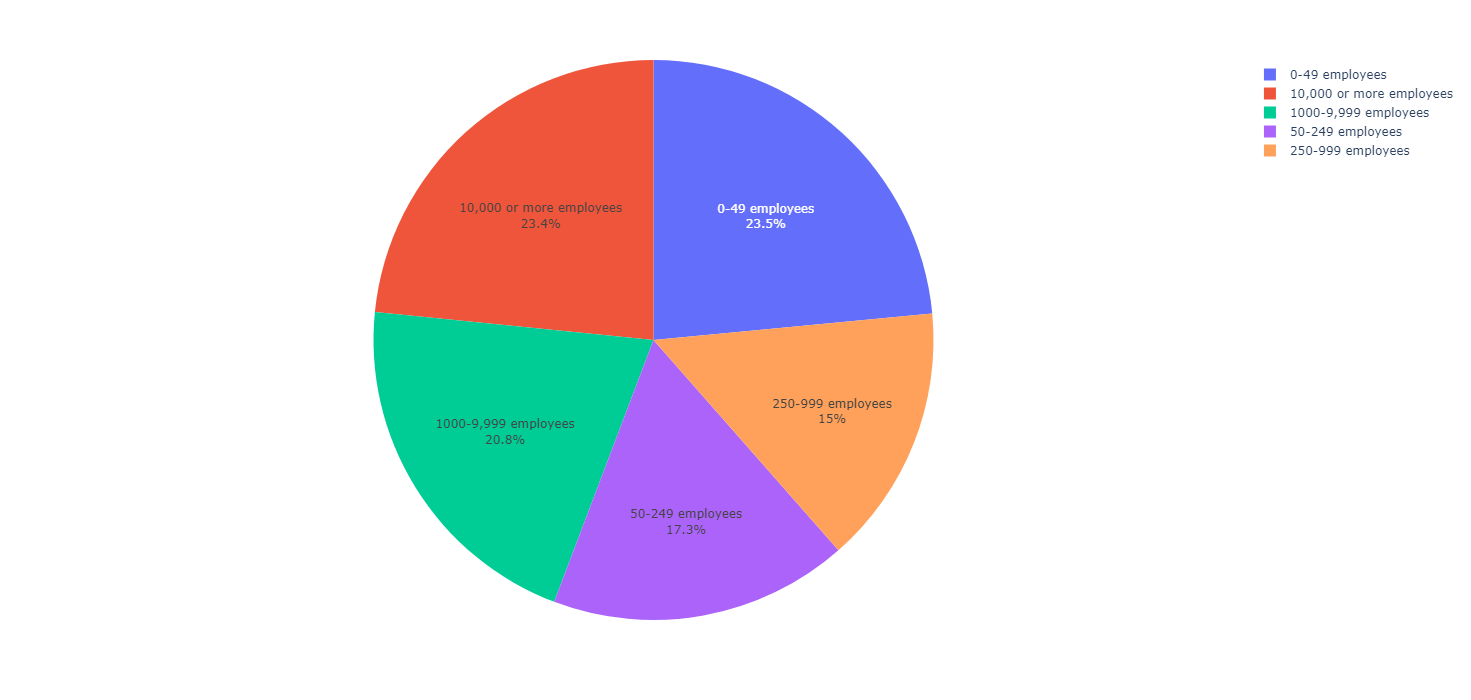

In [358]:
fig = px.pie(company_size, names=company_size.index, values="Totals", height=700, width=1000)

fig.update_traces(textposition="inside", textinfo='label+percent')

fig.show()

Small to medium companies are responsible for most of the employment in the space.

In [360]:
bi_columns = [column for column in data.columns if column.startswith("Q36")]
bi_columns

['Q36_1',
 'Q36_2',
 'Q36_3',
 'Q36_4',
 'Q36_5',
 'Q36_6',
 'Q36_7',
 'Q36_8',
 'Q36_9',
 'Q36_10',
 'Q36_11',
 'Q36_12',
 'Q36_13',
 'Q36_14',
 'Q36_15']

In [371]:
bi_names = list(data[bi_columns].iloc[0].str.split("- ").str.get(-1).str.strip())

In [384]:
ranked_bi_tools = pd.DataFrame(data[bi_columns].rename(columns=dict(zip(bi_columns, bi_names))).iloc[1:,].fillna(0).ne(0).sum(), columns=["Totals"]).sort_values(by="Totals")
ranked_bi_tools.head()

Totals
Thoughtspot              22
Sisense                  38
Domo                     44
TIBCO Spotfire           86
SAP Analytics Cloud     106

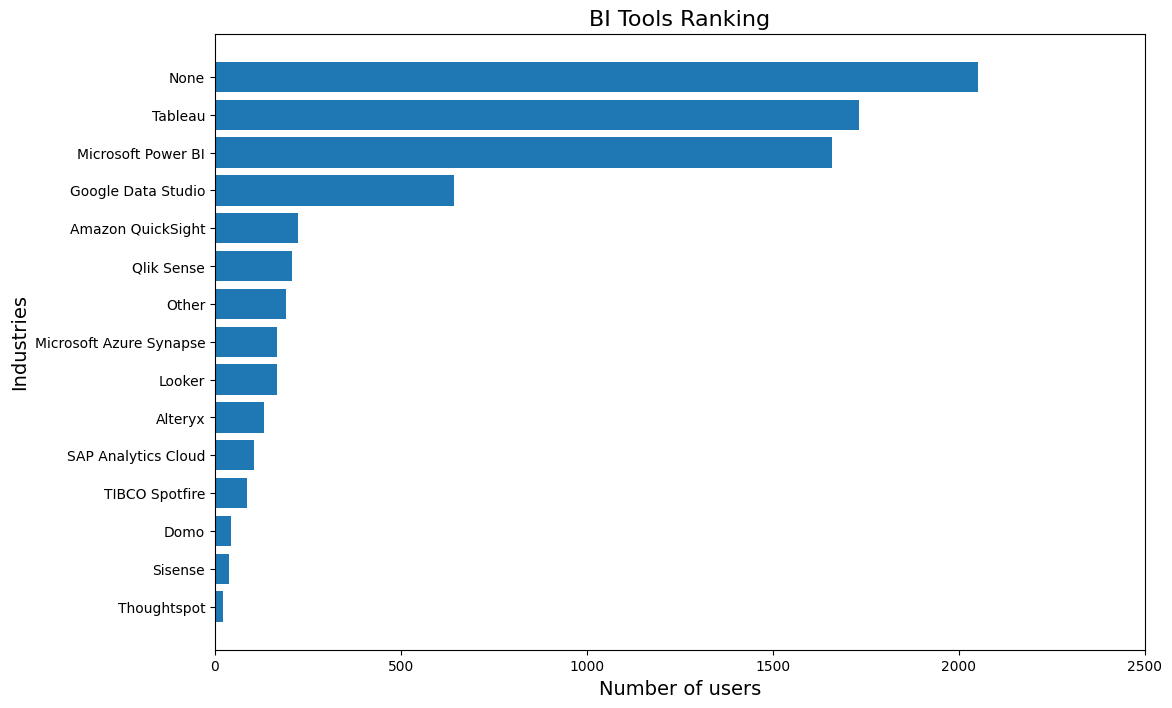

In [409]:
plt.figure(figsize=(12,8))

plt.xlabel("Number of users", fontsize=14)
plt.ylabel("Industries", fontsize=14)
plt.title("BI Tools Ranking", fontsize=16)
plt.xlim(0, 2500)

plt.barh(y=ranked_bi_tools.index, width=ranked_bi_tools["Totals"])

plt.show()

In [392]:
media_source_columns = [column for column in data.columns if column.startswith("Q44")]

In [399]:
media_source_name = list(data[media_source_columns].iloc[0].str.split("- ").str.get(-1).str.strip())

In [408]:
ranked_media_sources = (pd.DataFrame(data[media_source_columns]
                                     .rename(columns=dict(zip(media_source_columns, media_source_name)))
                                     .iloc[1:,]
                                     .fillna(0)
                                     .ne(0)
                                     .sum(), columns=["Totals"]).sort_values(by="Totals"))

ranked_media_sources

Totals
Other                                                  835
None                                                  1268
Slack Communities (ods.ai, kagglenoobs, etc)          1726
Podcasts (Chai Time Data Science, O’Reilly Data...    2120
Reddit (r/machinelearning, etc)                       2678
Email newsletters (Data Elixir, O'Reilly Data &...    3787
Journal Publications (peer-reviewed journals, c...    3804
Twitter (data science influencers)                    3995
Course Forums (forums.fast.ai, Coursera forums,...    4006
Blogs (Towards Data Science, Analytics Vidhya, ...    7766
Kaggle (notebooks, forums, etc)                      11181
YouTube (Kaggle YouTube, Cloud AI Adventures, etc)   11957

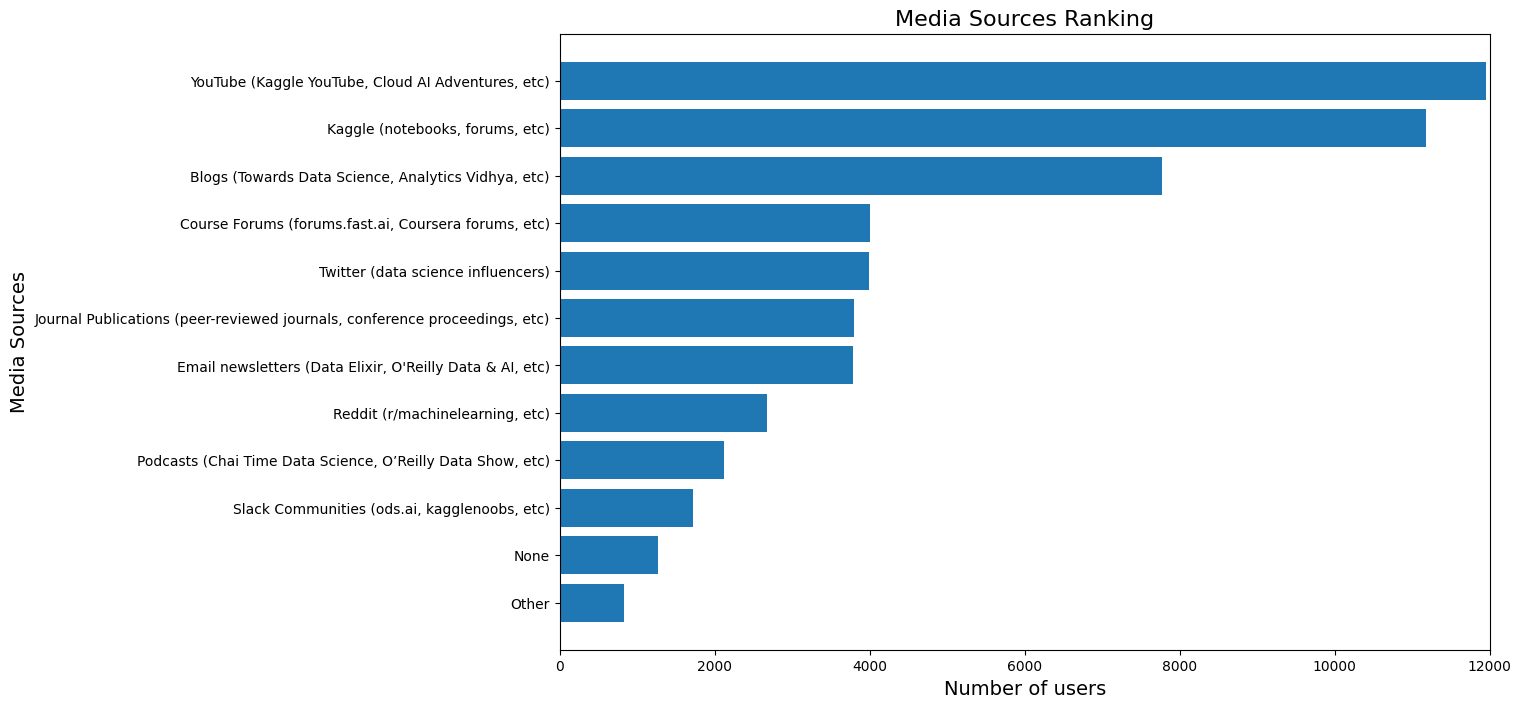

In [412]:
plt.figure(figsize=(12,8))

plt.xlabel("Number of users", fontsize=14)
plt.ylabel("Media Sources", fontsize=14)
plt.title("Media Sources Ranking", fontsize=16)
plt.xlim(0, 12000)

plt.barh(y=ranked_media_sources.index, width=ranked_media_sources["Totals"])

plt.show()